## Importando bibliotecas

In [1]:
import pandas as pd
import re
import regex
import nltk
from nltk.stem.lancaster import LancasterStemmer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import unidecode
import spacy
from collections import Counter
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearnex import patch_sklearn
patch_sklearn()

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
plt.rcParams["figure.figsize"] = [21,9]
plt.rcParams['figure.dpi'] = 300

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('rslp')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

c:\Users\rafae\anaconda3\envs\PLN\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading pa

True

In [2]:

nlp = spacy.load('en_core_web_trf')

stopwords = nltk.corpus.stopwords.words('english')

## Pré processamento realizado na lista 1

In [3]:
# def utils_preprocess_text(text, flg_stemm=False, flg_lemm=False, lst_stopwords=None, remove_accents = False):
    
#     text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
#     text = re.sub('\w*\d\w*', ' ', text)
#     text = ' '.join(text.split())
#     text = ''.join(c for c in text if not c.isdigit())

#     # doc = nlp(text)
#     # lst_text = [token.text for token in doc]
#     # lst_text = ' '.join(text)
#     lst_text = text.split()
            
#     if lst_stopwords is not None:
#         lst_text = [word for word in lst_text if word not in 
#                     lst_stopwords]
              
#     if flg_stemm == True:
#         ps = LancasterStemmer()
#         lst_text = [ps.stem(word) for word in lst_text]

#     if flg_lemm == True:
#         lst_text = nlp(text)
#         lst_text = [word.lemma_ for word in lst_text if word.pos_ == 'VERB' or word.pos_ == 'NOUN']
    
#     if remove_accents == True:
#         lst_text = [unidecode.unidecode(word) for word in lst_text]
    
#     text = " ".join(lst_text)
#     return text

# def tokenizer(column):
#     new_column = []
#     for doc in nlp.pipe(column, disable=['parser', 'tagger', 'ner'], n_process= 8):
#         text = [token.text for token in doc]
#         new_column.append(' '.join(text))
#     return new_column

    
# def clean_text(df):
#     df['clean_text'] = tokenizer(df['article'])
#     df['clean_text'] = df['clean_text'].apply(lambda x: utils_preprocess_text(x,True,False,stopwords,False))
#     display(df.head(5))
#     return df

# df = pd.read_csv(r'bbc\files_and_targets.csv')
# df = clean_text(df)
# df.to_csv('clean_dataset.csv',index = False)

### Carregando dataset processado

In [1]:
import pandas as pd
from sklearn import feature_extraction, metrics

In [3]:
df = pd.read_csv('../../clean_dataset.csv')

###  Usando sua base de textos após os pré-processamento realizados na lista 1, realize as seguintes tarefas:
## 1 - Escolha 10 documentos da base, e determine seu documento mais parecido (que não pode ser ele mesmo), usando:

In [6]:
def check_similar_single(sparse_matrix,df,row_number):
    row = sparse_matrix.getrow(row_number)
    cosine_similarities = cosine_similarity(row,sparse_matrix).flatten()
    
    related_docs_indices = cosine_similarities.argsort()[::-1][:10]
    # print(related_docs_indices)
    # print(cosine_similarities[related_docs_indices])
    filtered_df = df.loc[related_docs_indices,['article']]
    filtered_df['cosine_similarity'] = cosine_similarities[related_docs_indices]
    filtered_df = filtered_df[filtered_df['cosine_similarity'] < 0.9999]
    return filtered_df.head(1)


### a) Representação vetorial CountVectorizer com similaridade do cosseno;

In [7]:
def count_vectorizer(df):
    v = feature_extraction.text.CountVectorizer(ngram_range=(1,2))
    corpus = df['clean_text']
    v.fit(corpus)
    count_vectors = v.transform(corpus)
    return count_vectors

### b) Representação vetorial TF-IDF com similaridade do cosseno;

In [8]:
def tf_idf_vectorizer(df):
    v = feature_extraction.text.TfidfVectorizer(sublinear_tf=True, ngram_range=(1,2))
    corpus = df['clean_text']
    v.fit(corpus)
    tf_idf_vectors = v.transform(corpus)
    return tf_idf_vectors


### Mostre pelo menos um trecho de cada par de documentos parecidos que justifique essa semelhança.

In [9]:
index_list = [1,951,193,1040,137,984,103,865,2000,1783]
for pos,i in enumerate(index_list):
    print(fr'Article: {pos+1}')
    df_aux = df.loc[[i],['article']]
    # df_aux['teste'] = 'a'
    print('\t\t Original article:')
    display(df_aux.head(1))
    print('\t\t Most similar article using count vectorizer:')
    display(check_similar_single(count_vectorizer(df),df,i))
    print('\t\t Most similar article using tf-idf vectorizer:')
    display(check_similar_single(tf_idf_vectorizer(df),df,i))

Article: 1
		 Original article:


article
1  Climate change and the fight against Aids are leading the list of concerns for the first day of the World Economic Forum in the Swiss resort of Davos.\n\nSome 2,000 business and political leaders from around the globe will listen to UK Prime Minister Tony Blair's opening speech on Wednesday. Mr Blair will focus on Africa's development plans and global warming. Earlier in the day came an update on efforts to have 3 million people on anti-Aids drugs by the end of 2005. The World Health Organisation (WHO) said 700,000 people in poor countries were on life-extending drugs - up from 440,000 six months earlier but amounting to only 12% of the 5.8 million who needed them. A $2bn "funding gap" still stood in the way of hitting the 2005 target, the WHO said.\n\nThe themes to be stressed by Mr Blair - whose attendance was announced at the last minute - are those he wants to dominate the UK's chairmanship of the G8 group of industrialised states. Other issues to be discussed at the five-day conference range from China's\n\neconomic power to Iraq's future after this Sunday's elections. Aside from Mr Blair, more than 20 other world leaders are expected to attend including French President Jacques Chirac - due to speak by video link after bad weather delayed his helicopter - and South African President Thabo Mbeki, whose arrival has been delayed by Ivory Coast peace talks. The Ukraine's new president, Viktor Yushchenko, will also be there - as will newly elected Palestinian leader Mahmoud Abbas. Showbiz figures will also put in an appearance, from U2 frontman Bono - a well-known campaigner on trade and development issues - to Angelina Jolie, a goodwill campaigner for the UN on refugees.\n\nUnlike previous years, protests against the WEF are expected to be muted. Anti-globalisation campaigners have called off a demonstration planned for the weekend. At the same time, about 100,000 people are expected to converge on the Brazilian resort of Porto Alegre for the World Social Forum - the so-called "anti-Davos" for campaigners against globalisation, for fair trade, and many other causes.\n\nIn contrast, the Davos forum is dominated by business issues - from outsourcing to corporate leadership - with bosses of more than a fifth of the world's 500 largest companies scheduled to attend. A survey published on the eve of the conference by PricewaterhouseCoopers said four in ten business leaders were "very confident" that their companies would see sales rise in 2005. Asian and American executives, however, were much more confident than their European counterparts. But the political discussions, focusing on Iran, Iraq and China, are likely to dominate media attention.\n

		 Most similar article using count vectorizer:


article  \
384  More than 2,000 business and political leaders from around the globe are arriving in the Swiss mountain resort Davos for the annual World Economic Forum (WEF). For five days, they will discuss issues ranging from China's economic power to Iraq's future after this Sunday's elections. UK Prime Minister Tony Blair and South African President Thabo Mbeki are among the more than 20 government leaders and heads of state leaders attending the meeting. Unlike previous years, protests against the WEF are expected to be muted. Anti-globalisation campaigners have called off a demonstration planned for the weekend.\n\nThe Brazilian city of Porto Alegre will host the rival World Social Forum, timed to run in parallel with the WEF's ritzier event in Davos.\n\nThe organisers of the Brazilian gathering, which brings together thousands of campaigners against globalisation, for fair trade, and many other causes, have promised to set an alternative agenda to that of the Swiss summit. However, many of the issues discussed in Porto Alegre are Davos talking points as well. "Global warming" features particularly high. WEF participants are being asked to offset the carbon emissions they cause by travelling to the event. Davos itself is in deep frost. The snow is piled high across the mountain village, and at night the wind chill takes temperatures down to minus 20C and less.\n\nUltimately, the forum will be dominated by business issues - from outsourcing to corporate leadership - with bosses of more than a fifth of the world's 500 largest companies scheduled to attend.\n\nBut much of the media focus will be on the political leaders coming to Davos, not least because the agenda of this year's forum seems to lack an overarching theme. "Taking responsibility for tough choices" is this year's official talking point, hinting at a welter of knotty problems. One thing seems sure, though: transatlantic disagreements over how to deal with Iran, Iraq and China are set to dominate discussions. Pointedly, only one senior official from President Bush's new administration is scheduled to attend. The US government may still make a conciliatory gesture, just as happened a year ago when Vice President Dick Cheney made a surprise appearance in Davos.\n\nUkraine's new president, Viktor Yushchenko, is to speak, just days after his inauguration, an event that crowned the civil protests against the rigged first election that had tried to keep him from power.\n\nThe European Union's top leaders, among them German Chancellor Gerhard Schroeder and European Commission President Manuel Barosso, will be here too. Mr Blair will formally open the proceedings, although his speech will be pre-empted by French President Jacques Chirac, who announced his attendance at the last minute and secured a slot for a "special message" two hours before Mr Blair speaks. The organisers also hope that the new Palestinian leader, Mahmoud Abbas, will use the opportunity for talks with at least one of the three Israeli deputy prime ministers coming to the event, a list that includes Shimon Peres. Davos fans still hark back to 1994, when talks between Yassir Arafat and Mr Peres came close to a peace deal. Mr Blair's appearance will be keenly watched too, as political observers in the UK claim it is a calculated snub against political rival Chancellor Gordon Brown, who was supposed to lead the UK government delegation.\n\nMicrosoft founder Bill Gates, the world's richest man and a regular at Davos, will focus on campaigning for good causes, though business interests will not be wholly absent either. Having already donated billions of dollars to the fight against Aids and Malaria, Mr Gates will call on world leaders to support a global vaccination campaign to protect children in developing countries from easily preventable diseases. On Tuesday, Mr Gates pledged $750m (£400m) of his own money to support the cause. Mr Gates' company, software giant Microsoft, also hopes to use Davos to sh

		 Most similar article using tf-idf vectorizer:


article  \
384  More than 2,000 business and political leaders from around the globe are arriving in the Swiss mountain resort Davos for the annual World Economic Forum (WEF). For five days, they will discuss issues ranging from China's economic power to Iraq's future after this Sunday's elections. UK Prime Minister Tony Blair and South African President Thabo Mbeki are among the more than 20 government leaders and heads of state leaders attending the meeting. Unlike previous years, protests against the WEF are expected to be muted. Anti-globalisation campaigners have called off a demonstration planned for the weekend.\n\nThe Brazilian city of Porto Alegre will host the rival World Social Forum, timed to run in parallel with the WEF's ritzier event in Davos.\n\nThe organisers of the Brazilian gathering, which brings together thousands of campaigners against globalisation, for fair trade, and many other causes, have promised to set an alternative agenda to that of the Swiss summit. However, many of the issues discussed in Porto Alegre are Davos talking points as well. "Global warming" features particularly high. WEF participants are being asked to offset the carbon emissions they cause by travelling to the event. Davos itself is in deep frost. The snow is piled high across the mountain village, and at night the wind chill takes temperatures down to minus 20C and less.\n\nUltimately, the forum will be dominated by business issues - from outsourcing to corporate leadership - with bosses of more than a fifth of the world's 500 largest companies scheduled to attend.\n\nBut much of the media focus will be on the political leaders coming to Davos, not least because the agenda of this year's forum seems to lack an overarching theme. "Taking responsibility for tough choices" is this year's official talking point, hinting at a welter of knotty problems. One thing seems sure, though: transatlantic disagreements over how to deal with Iran, Iraq and China are set to dominate discussions. Pointedly, only one senior official from President Bush's new administration is scheduled to attend. The US government may still make a conciliatory gesture, just as happened a year ago when Vice President Dick Cheney made a surprise appearance in Davos.\n\nUkraine's new president, Viktor Yushchenko, is to speak, just days after his inauguration, an event that crowned the civil protests against the rigged first election that had tried to keep him from power.\n\nThe European Union's top leaders, among them German Chancellor Gerhard Schroeder and European Commission President Manuel Barosso, will be here too. Mr Blair will formally open the proceedings, although his speech will be pre-empted by French President Jacques Chirac, who announced his attendance at the last minute and secured a slot for a "special message" two hours before Mr Blair speaks. The organisers also hope that the new Palestinian leader, Mahmoud Abbas, will use the opportunity for talks with at least one of the three Israeli deputy prime ministers coming to the event, a list that includes Shimon Peres. Davos fans still hark back to 1994, when talks between Yassir Arafat and Mr Peres came close to a peace deal. Mr Blair's appearance will be keenly watched too, as political observers in the UK claim it is a calculated snub against political rival Chancellor Gordon Brown, who was supposed to lead the UK government delegation.\n\nMicrosoft founder Bill Gates, the world's richest man and a regular at Davos, will focus on campaigning for good causes, though business interests will not be wholly absent either. Having already donated billions of dollars to the fight against Aids and Malaria, Mr Gates will call on world leaders to support a global vaccination campaign to protect children in developing countries from easily preventable diseases. On Tuesday, Mr Gates pledged $750m (£400m) of his own money to support the cause. Mr Gates' company, software giant Microsoft, also hopes to use Davos to sh

Article: 2
		 Original article:


article
951  Talks aimed at averting a series of national strikes over pensions reforms will take place this weekend.\n\nFive public sector unions will hold private talks with Deputy Prime Minister John Prescott at Labour's spring conference in Gateshead. They want the government to withdraw regulations - due to be introduced in weeks - which would raise the pension age for council workers from 60 to 65. Up to 1.4m workers could take part in a strike already earmarked for 23 March. However, all sides are anxious to avoid a major confrontation in the run up to the general election, said BBC labour affairs correspondent Stephen Cape. In four days, Britain's biggest union Unison will start balloting 800,000 local government workers on strikes. Other public sector unions have pledged to follow. It is just weeks before new regulations are introduced to raise the pension age of local government workers.\n\nThe five unions meeting Mr Prescott want the government to withdraw these regulations. This would allow months of tough negotiations to follow, said our correspondent. But a spokesman for Mr Prescott warned that the changes to the local government pension scheme would have to go ahead in April. Privately ministers believe this will be the "less painful" option, our correspondent added. The Public and Commercial Services Union (PCS) will co-ordinate any industrial action with up to six other public sector unions. PCS leader Mark Serwotka warned last week that there could be further walkouts unless there was a government rethink. "For a government that lectures everyone on choice - choice on public service, choice on this and choice on that - isn't it ironic that they're saying to public sector workers there is no choice," he said. "If you want the pension you were promised when you started you must work for an extra five years - that is working until people drop. "In the 20th century, it's completely unacceptable."\n\nUnison's 800,000 workers, the Transport and General Workers' Union's 70,000 and Amicus' 20,000 are among those being balloted about a 23 March walkout. Mr Prescott held a private meeting with senior union figures last week. It is understood no deal was offered in that meeting but there was room for further negotiations.\n

		 Most similar article using count vectorizer:


article  \
974  Talks aimed at averting national strikes over pension reforms have ended without agreement after 90 minutes.\n\nFive public sector unions met Deputy Prime Minister John Prescott at the Labour spring conference in Gateshead. They want the government to withdraw regulations - due to be introduced in weeks - which would raise the pension age for council workers from 60 to 65. Up to 1.4 million workers could take part in strikes earmarked for 23 March. Discussions will resume next week.\n\nA spokesman for Unison, Britain's biggest union, said after Saturday's meeting: "At least we are still talking." All sides are anxious to avoid a major confrontation in the run up to the general election, said BBC labour affairs correspondent Stephen Cape. In four days, Unison will start balloting 800,000 local government workers on strikes. Other public sector unions have pledged to follow. The five unions which met Mr Prescott want the government to withdraw these regulations. This would allow months of tough negotiations to follow, said our correspondent. But a spokesman for Mr Prescott warned that the changes to the local government pension scheme would have to go ahead in April.\n\nPrivately ministers believe this will be the "less painful" option, our correspondent added. The Public and Commercial Services Union (PCS) will co-ordinate any industrial action with up to six other public sector unions. PCS leader Mark Serwotka warned last week that there could be further walkouts unless there was a government rethink. "For a government that lectures everyone on choice - choice on public service, choice on this and choice on that - isn't it ironic that they're saying to public sector workers there is no choice," he said. "If you want the pension you were promised when you started you must work for an extra five years - that is working until people drop. "In the 20th century, it's completely unacceptable."\n\nUnison's 800,000 workers, the Transport and General Workers' Union's 70,000 and Amicus' 20,000 are among those being balloted about a 23 March walkout. Mr Prescott held a private meeting with senior union figures last week. It is understood no deal was offered in that meeting but there was room for further negotiations.\n   

     cosine_similarity  
974            0.94008

		 Most similar article using tf-idf vectorizer:


article  \
974  Talks aimed at averting national strikes over pension reforms have ended without agreement after 90 minutes.\n\nFive public sector unions met Deputy Prime Minister John Prescott at the Labour spring conference in Gateshead. They want the government to withdraw regulations - due to be introduced in weeks - which would raise the pension age for council workers from 60 to 65. Up to 1.4 million workers could take part in strikes earmarked for 23 March. Discussions will resume next week.\n\nA spokesman for Unison, Britain's biggest union, said after Saturday's meeting: "At least we are still talking." All sides are anxious to avoid a major confrontation in the run up to the general election, said BBC labour affairs correspondent Stephen Cape. In four days, Unison will start balloting 800,000 local government workers on strikes. Other public sector unions have pledged to follow. The five unions which met Mr Prescott want the government to withdraw these regulations. This would allow months of tough negotiations to follow, said our correspondent. But a spokesman for Mr Prescott warned that the changes to the local government pension scheme would have to go ahead in April.\n\nPrivately ministers believe this will be the "less painful" option, our correspondent added. The Public and Commercial Services Union (PCS) will co-ordinate any industrial action with up to six other public sector unions. PCS leader Mark Serwotka warned last week that there could be further walkouts unless there was a government rethink. "For a government that lectures everyone on choice - choice on public service, choice on this and choice on that - isn't it ironic that they're saying to public sector workers there is no choice," he said. "If you want the pension you were promised when you started you must work for an extra five years - that is working until people drop. "In the 20th century, it's completely unacceptable."\n\nUnison's 800,000 workers, the Transport and General Workers' Union's 70,000 and Amicus' 20,000 are among those being balloted about a 23 March walkout. Mr Prescott held a private meeting with senior union figures last week. It is understood no deal was offered in that meeting but there was room for further negotiations.\n   

     cosine_similarity  
974           0.871279

Article: 3
		 Original article:


article
193  India's biggest oil exploration firm, Oil & Natural Gas Corp (ONGC), says it is in talks to buy the former assets of troubled Russian crude producer Yukos.\n\n"We are in touch with the concerned Russian entities about the Yukos assets and other opportunities in Russia," said ONGC chairman Subir Raha. Local press had reported that ONGC was looking to buy 15% of Yukos' former key oil production unit for $2bn (£1bn). Yukos is being broken up by Russian authorities to pay a massive tax bill.\n\nIt was forced to sell its key production unit Yuganskneftegas (Yugansk) last month after being hit with a bill of $27bn in unpaid taxes and fines.\n\nState-owned Rosneft now owns Yugansk and Russia has said it will turn the oil producer into a stand-alone firm. Indian oil minister Mani Shankar Aiyar discussed ONGC's plans during a trip to Moscow last year, and the topic came up again during Russian president Vladimir Putin's recent visit to New Delhi. "It would make great sense for us to build on that," said Mr Aiyar. India's oil production has stagnated over recent years, and it is having to look abroad to secure future supplies. India imports about 70% of its total oil consumption. At the same time, India's economy is booming and the country's thirst for oil is so strong that it has helped pushed up the price of crude worldwide.\n\nIndia produces about 793,000 barrels of oil per day (bpd), little changed since the start of the 1990s, according to oil industry analysts Douglas-Westwood. Consumption, meanwhile, has jumped to 2.4 million bpd, compared with 474,000 bpd in 1973.\n\n"For countries to develop, they have to have access to energy," said John Westwood, managing director of oil industry analysts Douglas-Westwood. India is a "dramatically growing economy that must have access to oil". By buying into Yugansk, ONGC would be able to reduce its dependence on Gulf states for oil imports, Mr Westwood explained, especially as the chances of finding and exploiting resources within India are slim. "We forecast that Indian production will go into significant decline," Mr Westwood said. "By 2020, production may only be at half of today's levels." ONGC, which is majority-owned by the Indian state, already has bought petroleum assets in countries including Vietnam, Sudan and Russia. The company is a partner with Rosneft in the Sakhalin-1 oil field off Russia's Siberian coast.\n\nONGC is, however, not the only firm interested in Yugansk.\n\nChinese crude company China National Petroleum has also been mentioned as a possible investor, while on Thursday, Italy refused to rule out an interest. ONGC's interest is the latest twist in a saga that has seen one of the world's biggest oil producers brought to its knees. The dispute is partly driven by President Putin's clampdown on the political ambitions of ex-Yukos boss Mikhail Khodorkovsky, who is currently in jail on charges of fraud and tax evasion. Yukos has been battling the Russian authorities for more than a year and has filed for bankruptcy protection in the US. Analysts have questioned how long it can continue to survive without Yugansk. On Thursday, a US court said it will hear arguments for Yukos' bankruptcy claim to be thrown out on 16 February. Should that happen, Yukos will have little chance of clawing back its assets, analysts said.\n

		 Most similar article using count vectorizer:


article  \
307  India has signed a $40bn (£21bn) deal to import millions of tonnes of liquefied natural gas from Iran.\n\nFirms led by the Oil & Natural Gas Corporation (ONGC) will also assist in the development of Iranian oil fields. Ministers, eager to gain access to energy supplies to meet the demands of a booming economy, secured a similar deal to one between Iran and China. The announcement comes as ONGC said it was in talks to buy former assets of troubled Russian oil firm Yukos. The agreements with Iran were sealed after talks in New Delhi between Middle East producers and Asia's biggest energy consumers - China, India, Japan and South Korea.\n\nIran - Opec's second-biggest oil producer and one of the world's top gas producers - has been pursuing a series of deals, rewarding LNG buyers with participation in development of its oil fields. Under the agreement, it will supply India with 7.5 million tonnes of LPG annually over a 25 year period from 2009. ONGC and the National Iranian Oil Company (NIOC) reached a preliminary deal for Indian firms to take part in the development of the Yadavaran and Jufeyr oilfields, both countries said in a statement. India's oil production has stagnated over recent years, and it is having to look abroad to secure future supplies. India imports about 70% of its total oil consumption. Consumption has jumped to 2.4 million barrels per day, compared with 474,000 bpd in 1973.\n   

     cosine_similarity  
307           0.486603

		 Most similar article using tf-idf vectorizer:


article  \
307  India has signed a $40bn (£21bn) deal to import millions of tonnes of liquefied natural gas from Iran.\n\nFirms led by the Oil & Natural Gas Corporation (ONGC) will also assist in the development of Iranian oil fields. Ministers, eager to gain access to energy supplies to meet the demands of a booming economy, secured a similar deal to one between Iran and China. The announcement comes as ONGC said it was in talks to buy former assets of troubled Russian oil firm Yukos. The agreements with Iran were sealed after talks in New Delhi between Middle East producers and Asia's biggest energy consumers - China, India, Japan and South Korea.\n\nIran - Opec's second-biggest oil producer and one of the world's top gas producers - has been pursuing a series of deals, rewarding LNG buyers with participation in development of its oil fields. Under the agreement, it will supply India with 7.5 million tonnes of LPG annually over a 25 year period from 2009. ONGC and the National Iranian Oil Company (NIOC) reached a preliminary deal for Indian firms to take part in the development of the Yadavaran and Jufeyr oilfields, both countries said in a statement. India's oil production has stagnated over recent years, and it is having to look abroad to secure future supplies. India imports about 70% of its total oil consumption. Consumption has jumped to 2.4 million barrels per day, compared with 474,000 bpd in 1973.\n   

     cosine_similarity  
307           0.223571

Article: 4
		 Original article:


article
1040  The Conservatives would stand up for the "forgotten majority", Michael Howard pledged as he unveiled the first part of the Tory election manifesto.\n\nThe Tory leader argued there was a mass of people whom he says feel let down by Tony Blair and who share Tory values. In the foreword to the manifesto, he promises to focus on restoring order, trying to lower taxes and giving power back to the people. Labour says the document offers only a return to a "failed Tory past". The Liberal Democrats say the Conservatives cannot win what they predict will be a three-party contest.\n\nCampaigning activity is accelerating ahead of the general election, which is widely tipped for May but could be any time before June 2006. Labour on Monday postponed a launch of election posters because of the Asian tsunami disaster. Mr Howard published the introduction to the Tory manifesto. Other chapters will follow in coming weeks.\n\nIn a speech in Northamptonshire, he said the "forgotten majority" made up the backbone of Britain. They were people who were saving for their first home or their retirement, working hard and accepting their responsibilities. He says in the manifesto foreword: "They have been forgotten, neglected and taken for granted by Mr Blair."\n\nSaying Britain must change direction, Mr Howard argues government is too big and cannot continue "down the path of ever rising taxes". He promises to ensure frontline professionals, parents and patients make the key decisions rather than Whitehall "bureaucrats". And he says the Tories would get a grip on crime, immigration and disorder. "The decline of responsibility and the proliferation of so-called 'human rights' have left us in a moral quagmire, unable to get a grip on rising crime and disorder," he says.\n\nMr Howard says he will produce a Timetable for Action so people can hold him to account but on issues like taxation he has so far only published options, not specific plans. Mr Howard told BBC News: "I'm determined to lower taxes but I'm also determined not to make any promises I can't keep." The Tories were unveiling material months ahead of the expected election because they needed time to make voters aware of their policies, he said. He was asked if Tory support for the government on Iraq and identity cards had given the Lib Dems the chance to portray themselves as the opposition to Labour. Mr Howard argued the only test for his policies was whether they were best for Britain. It had nothing to do with putting "clear blue water" between himself and his opponents.\n\nLabour's election slogan will be: "Britain's working, don't let the Tories wreck it again". Campaign coordinator Alan Milburn accused the Tories of "launching Thatcherism in instalments" while Labour helped the hard working majority of families. Lib Dem president Simon Hughes said his party had set out its election stance in September. "The Liberal Democrats will ask the British people for support this year as the party with the policies best able to deliver freedom and fairness and to restore trust," he said.\n

		 Most similar article using count vectorizer:


article  \
918  Michael Howard has dismissed fears from some Conservatives that his plans for £4bn tax cuts are too modest.\n\nHe defended the package, saying it was a plan for the Tories' first Budget and he hoped to be able to go further. The Tories on Monday highlighted £35bn in "wasteful" spending they would stop to allow tax cuts, reduced borrowing and more spending on key services. Labour and the Liberal Democrats say the party's sums do not add up and claim it would cut frontline services. The Tory tax plan follows complaints from some of the party's MPs that Mr Howard and shadow chancellor Oliver Letwin have taken too long to unveil the proposals. Now they have promised a figure but have yet to reveal which taxes would be targeted.\n\nTory backbencher Edward Leigh said the proposals were a step in the right direction but he told the Financial Times: "I would come up sooner with much greater tax cuts." Interviewed on BBC Radio 2's Jeremy Vine show, Mr Howard said: "It is perfectly true that I am being attacked on one side by people who think we ought to be promising much, much bigger tax cuts and spending cuts.\n\n"On the other side, there are people who say we won't be able to achieve these tax cuts. "I think we have got it about right." Mr Howard said voters faced a clear choice at the next election between more waste and more tax under Labour and Tory value for money and lower taxes. He added: "I would like to be able to do more, and over time I am sure we will be able to do more, but at the start, we have got to recognise there is a limit to what we can do in one go, in our first Budget. "I have got to be responsible about this."\n\nThe latest Tory plans came as campaigning for the election - widely expected in May - gathered pace. The Liberal Democrats launched their pre-election platform, with leader Charles Kennedy saying his party was the "authentic opposition", particularly on the Iraq war, council tax and university tuition fees. Lib Dem Treasury spokesman Vince Cable also branded the Tory plans as "fantasy economics". Labour hit back at the Tory proposals even before their publication with election coordinator Alan Milburn accusing Mr Howard of producing a "fraudulent prospectus". The party on Tuesday challenged the Tories to publish the full report from David James, the trouble-shooter they asked to identify possible savings. But the Tories are in turn demanding that Tony Blair spell out which taxes he would raise if he wins the election.\n   

     cosine_similarity  
918           0.443728

		 Most similar article using tf-idf vectorizer:


article  \
915  Tony Blair has said voters will have to wait for Labour's manifesto to see if the party has plans to increase tax.\n\nThe premier was responding to a challenge from Tory leader Michael Howard who said Labour would raise taxes in its post-election Budget. Mr Blair derided Tory claims they could cut £35bn in "wasteful spending" saying the party had got its sums wrong. The two political leaders clashed just days after the opening salvoes of the pre-election period. Mr Howard told MPs that "every independent expert" from the International Monetary Fund to the Institute of Fiscal Studies had suggested the "government was spending more than it is raising and a Labour chancellor would have to put up taxes". Mr Blair replied: "I think they are wrong for this very simple reason: that the Treasury forecasts on the economy have been proven right." The Tories on Monday highlighted their plans for tax cuts worth £4bn, although the specific taxes to be cut have not been announced.\n\nThey also spelled out their plans for reduced government borrowing and more spending on key services. Labour and the Liberal Democrats have said the party's sums do not add up and claim it would cut frontline services. But Mr Howard said voters faced a clear choice at the next election between more waste and more tax under Labour and Tory value for money and lower taxes. The Liberal Democrats have also launched their pre-election platform, with leader Charles Kennedy saying his party was the "authentic opposition", particularly on the Iraq war, council tax and university tuition fees. Labour hit back at the Tory proposals even before their publication with election coordinator Alan Milburn accusing Mr Howard of producing a "fraudulent prospectus".\n   

     cosine_similarity  
915           0.112832

Article: 5
		 Original article:


article
137  The US dollar hovered close to record lows against the euro on Friday as concern grows about the size of the US budget deficit.\n\nAnalysts predict that the dollar will remain weak in 2005 as investors worry about the state of the US economy. The Bush administration's apparent unwillingness to intervene to support the dollar has caused further concern. However, trading has been volatile over the past week because of technical and automated trading and light demand. This has amplified reactions to news, analysts said, adding that they expect markets to become less jumpy in January.\n\nThe dollar was trading at $1.3652 versus the euro on Friday morning after hitting a fresh record low of $1.3667 on Thursday. One dollar bought 102.55 yen.\n\nDisappointing business figures from Chicago triggered the US currency's weakness on Thursday. The National Association of Purchasing Management-Chicago said its manufacturing index dropped to 61.2, a bigger fall than expected. "There are no dollar buyers now, especially after the Chicago data yesterday," said ABN Amro's Paul Mackel. At the same time, German Chancellor Gerhard Schroeder and Italian Prime Minister Silvio Berlusconi voiced concerns about the strength of the euro. Mr Berlusconi said the euro's strength was "absolutely worrying" for Italian exports. Mr Schroeder said in a newspaper article that stability in foreign exchange markets required a correction of global economic imbalances. Investors will now look towards February's meeting of finance ministers from the G7 industrialised nations in London for clues as to whether central banks will combine forces to stem the dollar's decline.\n

		 Most similar article using count vectorizer:


article  \
158  The US dollar has hit a new record low against the euro and analysts predict that more declines are likely in 2005.\n\nDisappointing economic reports dented the currency, which had been rallying after European policy makers said they were worried about the euro's strength. Earlier on Thursday, the Japanese yen touched its lowest versus the euro on concerns about economic growth in Asia. Currency markets have been volatile over the past week because of technical and automated trading and light demand. This has amplified reactions, analysts said, adding that they expect markets to become less jumpy in January.\n\n"People want to go into the weekend and the New Year positioned for a weaker buck," said Tim Mazanec, director of foreign exchange at Investors Bank and Trust. The dollar slid to a record $1.3666 versus the euro on Thursday, before bouncing back to $1.3636. Against the yen the dollar was trading down at $103.05.\n\nThe yen, meanwhile, dropped to 141.60 per euro in afternoon trading. It later strengthened to 140.55. Investors are concerned about the size of the US trade and budget deficits and are betting that George W Bush's administration will allow the dollar to weaken despite saying they favour a strong currency. Also playing on investors' minds are mixed reports about the state of the US economy. On Thursday, disappointing business figures from Chicago brought a sudden end to a rally in the value of the dollar. The National Association of Purchasing Management-Chicago said its index dropped to 61.2, more than analysts had expected. German Chancellor Gerhard Schroeder and Italian Prime Minister Silvio Berlusconi voiced concerns about the strength of the euro. Mr Berlusconi said the euro's strength was "absolutely worrying" for Italian exports. Mr Schroeder said in a newspaper article that stability in foreign exchange markets required a correction of global economic imbalances.\n   

     cosine_similarity  
158           0.682909

		 Most similar article using tf-idf vectorizer:


article  \
158  The US dollar has hit a new record low against the euro and analysts predict that more declines are likely in 2005.\n\nDisappointing economic reports dented the currency, which had been rallying after European policy makers said they were worried about the euro's strength. Earlier on Thursday, the Japanese yen touched its lowest versus the euro on concerns about economic growth in Asia. Currency markets have been volatile over the past week because of technical and automated trading and light demand. This has amplified reactions, analysts said, adding that they expect markets to become less jumpy in January.\n\n"People want to go into the weekend and the New Year positioned for a weaker buck," said Tim Mazanec, director of foreign exchange at Investors Bank and Trust. The dollar slid to a record $1.3666 versus the euro on Thursday, before bouncing back to $1.3636. Against the yen the dollar was trading down at $103.05.\n\nThe yen, meanwhile, dropped to 141.60 per euro in afternoon trading. It later strengthened to 140.55. Investors are concerned about the size of the US trade and budget deficits and are betting that George W Bush's administration will allow the dollar to weaken despite saying they favour a strong currency. Also playing on investors' minds are mixed reports about the state of the US economy. On Thursday, disappointing business figures from Chicago brought a sudden end to a rally in the value of the dollar. The National Association of Purchasing Management-Chicago said its index dropped to 61.2, more than analysts had expected. German Chancellor Gerhard Schroeder and Italian Prime Minister Silvio Berlusconi voiced concerns about the strength of the euro. Mr Berlusconi said the euro's strength was "absolutely worrying" for Italian exports. Mr Schroeder said in a newspaper article that stability in foreign exchange markets required a correction of global economic imbalances.\n   

     cosine_similarity  
158           0.488577

Article: 6
		 Original article:


article
984  Tory leader Michael Howard has dismissed claims that his immigration policy was "moving onto the turf" of the British National Party (BNP).\n\nBNP leader Nick Griffin told the Independent he expected some BNP voters to switch to the Tories over the issue. But Mr Howard said he rejected the idea that the Tories and BNP appealed to the same voting instincts. Asked if he would welcome BNP voters he told the BBC: "I don't want anybody to vote for these extremist parties". He added, on BBC Radio 4's Today programme: "If you want good community relations in this country...then you have to have firm, fair immigration controls."\n\nThe Tories have promised an upper limit on the number of people allowed into Britain with the slogan: "It's not racist to impose limits on immigration". All parties are stepping up campaiging in the run-up to the general election, widely expected to be called for 5 May. Labour has unveiled its own "points system" for ensuring migrants who want to work in the UK have skills that are required, but have rejected immigration quotas. The Liberal Democrats have warned both parties against "pandering to prejudice".\n\nMr Griffin told the Independent the Tories' plans were "a definite move onto our turf". He said: "I quite freely accept that on a nationwide basis, the Tories will con enough people to make a significant hole in our vote." Asked whether he was comfortable with the perception that the Conservatives and the BNP appeal to the same voting instincts, Mr Howard told the BBC: "I reject that entirely". He said he found BNP's policies "abhorrent" but he said the UK had to take a different approach to immigration, which he said was out of control. "The government doesn't want to limit it in any way, we do, there's a legitimate difference between us there which we can discuss in a calm, rational and reasonable way," he said. He again rejected newspaper speculation that his own father entered Britain illegally.\n

		 Most similar article using count vectorizer:


article  \
1076  The Liberal Democrats will present themselves as "the real alternative" in the forthcoming general election campaign, Charles Kennedy has said.\n\nUnveiling the slogan at the party's spring conference, he said there was no "glass ceiling" to its ambitions. He told delegates that Labour had abused the public's trust and that the Tories had failed to oppose them. In response, the Conservatives insisted that theirs was the party that understood the "forgotten majority".\n\nSpeaking in Harrogate Mr Kennedy said: "People want a credible, principled political party which offers a different vision of what Britain can be."\n\nOnly the Liberal Democrats stood against the Iraq war, he said, and they had also provided strong opposition to the government's plans on ID cards, anti-terror measures and taxation. He said: "If you voted Conservative in 2001 ... what good did it do you? Your vote was wasted. "What people needed was ... a party which was listening to their concerns; a party which was prepared to stand up and say so; a party which said no to the prime minister." Responding to the claims Tory Party co-chairman Liam Fox said: "Like Labour, the Lib Dems are soft on crime, support higher taxes, oppose controlled immigration and support giving Europe more control over our lives."\n\nMr Kennedy also outlined his party's plan to impose a 50% income tax rate on earnings over £100,000 a year. The money would be used to help pay for key policies such as abolishing university tuition fees, scrapping council tax in favour of local income tax, and providing free care for the elderly, he said. Labour and the Tories claim the sums do not add up, and that working families would be hardest hit. Mr Kennedy said: "Britain is the fourth-largest economy in the world. We have world class businesses and a world class workforce.\n\n"So why are two million of our pensioners living below the poverty line?" All the parties are campaigning hard for an expected election in May, although Prime Minister Tony Blair has not confirmed any timing. Earlier, Mr Kennedy told Radio 4's Today programme there was no possibility of forming a coalition with Labour in the event of a hung Parliament. "We go into the election as an independent party and we come out as an independent party," he said. Mr Kennedy has been under fire in recent days for missing Monday's Commons vote on the government's controversial anti-terrorism laws, along with 16 other Lib Dem MPs. On Saturday, the Lib Dem chief executive said it was "just a cock-up" that Mr Kennedy and his colleagues missed the vote, which the government won by a majority of only 14. "Nobody had any idea that was going to happen," Lord Rennard told reporters at the party conference. He said he was certain MPs would get another chance to vote against the plans.\n   

      cosine_similarity  
1076           0.329226

		 Most similar article using tf-idf vectorizer:


article  \
1289  Tory plans to cut immigration to the UK are not racist and will make the asylum system fairer for genuine refugees, Michael Howard has said.\n\nAs his party set out detailed asylum reform plans, Mr Howard said they would help smash people smuggling gangs. There would be an annual limit on asylum and all claims would be processed overseas. Some charities say the plans would put refugees' lives at risk if they were turned away once quotas were filled.\n\nTony Blair said Labour would set out workable plans for tackling immigration abuse in the next few weeks and attacked the Tory plans. "By cutting the number of front-line immigration staff at our borders, they will actually make the problem worse," said Mr Blair. Liberal Democrat chairman Matthew Taylor said there needed to be a quick, fair and firm asylum system. But he said it was "absolutely disgusting" to propose a system which could turn away genuine refugees. The Conservatives say there is little risk of this happening as demand for asylum will be considered when quotas are set.\n\nIn a speech in London on Monday, Mr Howard said: "It's not racist, as some people to claim, to talk about controlling immigration far from it." He said that coming from an immigrant family himself he recognised that "firm but fair" immigration controls were essential for good community relations.\n\n\n - Withdrawing from the 1951 United Nations Convention on refugees, which obliges countries to accept people being persecuted on the basis of need, not numbers \n - Introduce laws to allow the immediate removal of asylum seekers whose claims were clearly unfounded because they came from safe countries or had destroyed documents \n - Detain asylum seekers without documents so people whose identity was not known were not able to move freely around the UK - a worry for "national security" \n - Stop considering asylum applications inside the UK and instead take people from United Nations refugee agency camps. Anyone applying for asylum would be taken to new centres close to their countries of origin. \n \n\nThe Tories also want quotas for those seeking work permits through an Australian-style points system and those wanting to join families in the UK.\n\nMr Howard said nearly 160,000 people were settling in the UK every year - the size of a city like Peterborough. The plans would help achieve a "substantial reduction" in immigration, he said, although he could not predict a figure. He said that only two out of 10 asylum seekers had their claims accepted under the current "unfair and inhumane" system.\n\n"We need to break the link between arriving in Britain and claiming asylum," Mr Howard said. "By breaking that link we can smash the criminal gangs at the heart of the trade in people smuggling."\n\nBut the UN refugees agency is worried the policy sends the wrong message to poorer countries which receive the bulk of refugees. And a spokesman for European Justice and Home Affairs Commissioner Franco Frattini said the plans would contravene EU asylum policy, which meant the UK could not simply refuse to hear an asylum case. Refugee Council Chief Executive Maeve Sherlock called the plans "dangerous, ill thought-out and hugely irresponsible". Lives could be put at risk if refugees were turned away once the quotas were filled, she warned. Commission for Racial Equality chairman Trevor Phillips said asylum applications were down 40% and economic migration down about 10%.\n\nHe did not think Mr Howard intended to centre the debate about race. But he warned that some campaigners could use his words to hint the policy was about keeping out people of a different colour or culture. Mr Howard called that suggestion "disgraceful".\n   

      cosine_similarity  
1289           0.089995

Article: 7
		 Original article:


article
103  French stock market regulator AMF has filed complaints against media giant Vivendi Universal, its boss and another top executive.\n\nIt believes the prospectus for a bond issue was unclear and that executives may have had privileged information. AMF has begun proceedings against Vivendi, its chief executive Jean-Rene Fourtou and chief operating officer Jean-Bernard Levy. Vivendi advisor Deutsche Bank was also the subject of a complaint filing. Deutsche Bank, which was responsible for selling the convertible bonds to investors, could face penalties if the complaint is upheld.\n\nVivendi has said it believes there is "no legal basis" for the complaints. The watchdog is said to believe the executive pair were party to "privileged information" surrounding the issue of the bonds. Both men bought some of the bonds, the Associated Press news agency reported. AMF is investigating claims that the duo were aware of an interest in Vivendi's US assets from investor Marvin Davis, at the time of the bond sale. Vivendi, however, has said that the information was public knowledge as Mr Davis' offer for the US assets had already been rejected by Vivendi's board. AMF is also looking into whether the executives knew that Vivendi was considering exercising its right to buy British Telecom's shares in Cegetel. Vivendi has rejected the charge, saying the decision to buy the Cegetel shares was "no more than a possibility, of which the public was perfectly aware" at the time of the bond issue. Back in December, Vivendi and its former chief executive Jean-Marie Messier were each fined 1m euros ($1.3m; £690,000) by AMF. The fines came after a 15-month probe into allegations that the media giant misled investors after a costly acquisition programme went wrong.\n

		 Most similar article using count vectorizer:


article  \
447  Pan-European stock market Euronext has approached the London Stock Exchange (LSE) about a possible takeover bid.\n\n"The approach is at an early stage and therefore does not require a response at this point," LSE said. Talks with the European stock market and with rival bidder Deutsche Boerse will continue, the LSE said. Last week, the group rejected a £1.3bn ($2.5bn) takeover offer from Deutsche Boerse, claiming that it undervalued the business. LSE saw its shares surge 4.9% to a new high of 583p in early trade, following the announcement on Monday.\n\nThe offer follows widespread media speculation that Euronext would make an offer for LSE. Experts now widely expect a bidding war for Europe's biggest stock market, which lists stocks with a total capitalisation of £1.4 trillion, to break out. Commentators say that a deal with Euronext, which owns the Liffe derivatives exchange in London and combines the Paris, Amsterdam and Lisbon stock exchanges, could potentially offer the LSE more cost savings than a deal with Deutsche Boerse.\n\nA weekend report in the Telegraph had quoted an unnamed executive at Euronext as saying the group would make a cash bid to trump Deutsche Boerse's offer. "Because we already own Liffe in London, the cost savings available to us from a merger are far greater than for Deutsche Boerse," the newspaper quoted the executive as saying. Euronext chief executive Jean-Francois Theodore is reported to have already held private talks with LSE's chief executive Clara Furse. Further reports had suggested that Euronext could make an offer in excess of the LSE's 533p a share closing price on Friday. However, Euronext said it could not guarantee "at this stage" that a firm offer would be made for LSE. There has been extensive speculation about a possible takeover of the company since an attempted merger with Deutsche Boerse failed in 2000.\n   

     cosine_similarity  
447           0.163728

		 Most similar article using tf-idf vectorizer:


article  \
210  German investment bank Deutsche Bank has challenged the right of Yukos to claim bankruptcy protection in the US.\n\nIn a court filing on Tuesday, it said the Russian oil giant has few Texas ties beyond bank accounts and a Texas-based finance chief. Deutsche Bank claimed Yukos had artificially manufactured a legal case to stop the sale of its main asset. It had wanted to help fund Gazprom's plans for a $10bn (£5.18bn) bid for Yukos unit Yuganskneftegas.\n\nDeutsche Bank would have earned large fees from the deal, which could not be carried out because US chapter 11 bankruptcy rules made the Kremlin's auction of Yuganskneftegas on 19 December illegal under US law.\n\nBut the US bankruptcy court judge in Texas granted Yukos an injunction that barred Gazprom and its lenders from taking part. Yuganskneftegas will ultimately end up with Gazprom. The winning bidder at the auction was a previously unknown firm, Baikal Finance Group, which was snapped up days later by Rosneft, a Russian oil firm that is in the process of merging with Gazprom. The effect of these transactions is to renationalise Yuganskneftegas. Deutsche Bank contends Yukos filed for bankruptcy earlier this month in Texas in a desperate and unsuccessful bid to stave off the 19 December auction of its top unit by the Russian government, which was in a tax dispute with Yukos.\n\n"This blatant attempt to artificially manufacture a basis for jurisdiction constitutes cause to dismiss this case," Deutsche Bank said in its court filing. Mike Lake, a spokesman for Yukos' lawyers, said on Tuesday that the company stands by its legal action. Yukos is confident of its right to US bankruptcy protection, and "we are prepared to be back in court defending that position again," he said. Yukos has said it intends to seek $20bn in damages from the buyer of Yuganskneftegas once the sale finally goes through. In its filing, Deutsche Bank said Houston was "a jurisdiction in which Yukos owns no real or personal property and conducts no business operations."\n\nIt also said the US bankruptcy court should not become involved in "a tax dispute between the Federation and one of its corporate citizens". It suggested the European Court or an international arbitration tribunal were more appropriate jurisdictions for the legal fight between Russia and Yukos. The next hearing in the bankruptcy is expected on 6 January. Analysts believe the tax dispute between the Russian government and Yukos is partly driven by Russian president Vladimir Putin's hostility hostility to the political ambitions of ex-Yukos boss Mikhail Khordokovsky. Mr Khodorkovsky is in jail, and on trial for fraud and tax evasion.\n   

     cosine_similarity  
210           0.050311

Article: 8
		 Original article:


article
865  The inclusion of downloaded music in the official singles chart has been delayed for a month.\n\nThe British Phonographic Industry (BPI) had planned to include download formats in the chart from 20 March. But the date has been put back to 17 April to create a "level playing field" for independent labels. The BPI is concerned that independent repertoire is not adequately represented online and said they were looking at ways of rectifying it.\n\nBPI chairman Peter Jamieson said: "The inclusion of download formats in the Official UK Singles Chart is the most significant development in the charts for 20 years.\n\n"But for a multitude of reasons the current chart representation of independent repertoire at the major download outlets is poor. "I am very pleased we have secured this delay on behalf of independents. We have to try and establish a realistic 'level playing field' of opportunity. The Official UK Charts are run by The Official UK Charts Company (OCC) - a joint venture between the BPI and the British Association of Record Dealers (BARD). At an OCC board meeting on Wednesday, the OCC board agreed with BPI members that the 20 March start date be postponed. Download formats will now be included in the Official UK Singles Chart for the first time in the chart published on 17 April - the sales week beginning 10 April. The US has already merged downloaded singles into its Billboard Hot 100 chart.\n

		 Most similar article using count vectorizer:


article  \
538  Digital music downloads are being included in the main US singles chart for the first time.\n\nBillboard's Hot 100 chart now incorporates data from sales of music downloads, previously only assigned to a separate download chart. Green Day's Boulevard of Broken Dreams is currently number two in Billboard's pop chart, and tops its digital chart. Download sales are due to be incorporated into the UK singles chart later this year.\n\nDigital sales in the US are already used to compile Billboard's Hot Digital Sales chart. They will now be tallied with sales of physical singles and airplay information to make up its new Hot 100 chart. Its second new chart - the Pop 100 - also combines airplay, digital and physical sales but confines its airplay information to US radio stations which play chart music. In addition to Green Day, other artists in the current US digital sales top 10 include Kelly Clarkson, The Game and the Killers.\n\nSales of legally downloaded songs shot up more than tenfold in 2004, with 200 million track purchased online in the US and Europe in 12 months, the International Federation of the Phonographic Industry (IFPI) reported last month. In the UK sales of song downloads overtook those for physical singles for the first time at the end of last year. The last week of December 2004 saw download sales of 312,000 compared with 282,000 physical singles, according to the British Phonographic Industry. The UK's first official music download chart was launched last September, compiling the most popular tracks downloaded from legal UK sites - including iTunes, OD2, mycokemusic.com and Napster. Westlife's Flying Without Wings - a 1999 track reissued for the occasion - was the first number one of the UK download chart.\n\nA spokesman for the British Phonographic Industry (BPI) said the first combined UK download and sales chart was due to be compiled "within the first half of this year". "Work is going on across the music business right now to make sure the new chart works to plan," he said. The BPI spokesman described the UK music download chart, compiled by the Official Charts Company, as having been "a great success" since its launch. "It has provided a focus for the industry and has really driven interest in downloads among music fans," he said.\n   

     cosine_similarity  
538           0.471452

		 Most similar article using tf-idf vectorizer:


article  \
596  A campaign has been launched to help independent labels get their music online and benefit from the growing trend for downloading music.\n\nThe British Phonographic Industry has identified a lack of independent music available for download. "We want to ensure that independent repertoire is as successful in the download world as it is in the physical world," said BPI chief Peter Jamieson. Downloaded singles have now overtaken physical singles in the UK. Mr Jamieson said his organisation was lobbying music service providers, which include iTunes and Napster, to urge them to promote independent releases. Download sales are due to be incorporated into the UK singles chart later this year. "With downloads shortly to be eligible for the singles chart, this is a key commercial issue on which the BPI committed to assisting its members," added Mr Jamieson. As part of the campaign the BPI is running a series of seminars entitled Getting Your Music Online, focusing on how independent labels can embrace digital music. The US has already begun incorporating download sales in the Billboard's Hot 100 chart.\n   

     cosine_similarity  
596            0.21303

Article: 9
		 Original article:


article
2000  The internet could soon have two new domain names, aimed at mobile services and the jobs market.\n\nThe Internet Corporation for Assigned Names and Numbers (Icann) has given preliminary approval to two new addresses - .mobi and .jobs. They are among 10 new names being considered by the net's oversight body. Others include a domain for pornography, an anti-spam domain as well as .post and .travel, for the postal and travel industries.\n\nThe .mobi domain would be aimed at websites and other services that work specifically around mobile phones, while the .jobs address could be used by companies wanting a dedicated site for job postings. The process to see the new domain names go live in cyberspace could take months and Icann officials warned that there were no guarantees they would ultimately be accepted. Applicants paid £23,000 apiece to have their proposals considered. The application for .mobi was sponsored by technology firms including Nokia, Microsoft and T-Mobile.\n\nOf the 10 currently under consideration, the least likely to win approval is the .xxx domain for pornographic websites. There are currently around 250 domain names in use around the globe, mostly for specific countries such as .fr for France and .uk for Britain. Perhaps unsurprisingly, .com remains the most popular address on the web.\n

		 Most similar article using count vectorizer:


article  \
2206  By early 2005 the net could have two new domain names.\n\nThe .post and .travel net domains have been given preliminary approval by the net's administrative body. The names are just two of a total of 10 proposed domains that are being considered by the Internet Corporation for Assigned Names and Numbers, Icann. The other proposed names include a domain for pornography, Asia, mobile phones, an anti-spam domain and one for the Catalan language and culture.\n\nThe .post domain is backed by the Universal Postal Union that wants to use it as the online marker for every type of postal service and to help co-ordinate the e-commerce efforts of national post offices.\n\nThe .travel domain would be used by hotels, travel firms, airlines, tourism offices and would help such organisations distinguish themselves online. It is backed by a New York-based trade group called The Travel Partnership. Icann said its early decision on the two domains was in response to the detailed technical and commercial information the organisations behind the names had submitted. Despite this initial approval, Icann cautioned that there was no guarantee that the domains would actually go into service. At the same time Icann is considering proposals for another eight domains. One that may not win approval is a proposal to set up a .xxx domain for pornographic websites. A similar proposal has been made many times in the past. But Icann has been reluctant to approve it because of the difficulty of making pornographers sign up and use it. In 2000 Icann approved seven other new domains that have had varying degrees of success. Three of the new so-called top level domains were for specific industries or organisations such as .museum and .aero. Others such as .info and .biz were intended to be more generic. In total there are in excess of 200 domain names and the majority of these are for nations. But domains that end in the .com suffix are by far the most numerous.\n   

      cosine_similarity  
2206           0.525297

		 Most similar article using tf-idf vectorizer:


article  \
2102  By early 2005 the net could have two new domain names.\n\nThe .post and .travel net domains have been given preliminary approval by the net's administrative body. The names are just two of a total of 10 proposed domains that are being considered by the Internet Corporation for Assigned Names and Numbers, Icann. The other proposed names include a domain for pornography, Asia, mobile phones, an anti-spam domain and one for the Catalan language and culture.\n\nThe .post domain is backed by the Universal Postal Union that wants to use it as the online marker for every type of postal service and to help co-ordinate the e-commerce efforts of national post offices.\n\nThe .travel domain would be used by hotels, travel firms, airlines, tourism offices and would help such organisations distinguish themselves online. It is backed by a New York-based trade group called The Travel Partnership. Icann said its early decision on the two domains was in response to the detailed technical and commercial information the organisations behind the names had submitted. Despite this initial approval, Icann cautioned that there was no guarantee that the domains would actually go into service. At the same time Icann is considering proposals for another eight domains. One that may not win approval is a proposal to set up a .xxx domain for pornographic websites. A similar proposal has been made many times in the past. But Icann has been reluctant to approve it because of the difficulty of making pornographers sign up and use it. In 2000 Icann approved seven other new domains that have had varying degrees of success. Three of the new so-called top level domains were for specific industries or organisations such as .museum and .aero. Others such as .info and .biz were intended to be more generic. In total there are in excess of 200 domain names and the majority of these are for nations. But domains that end in the .com suffix are by far the most numerous.\n   

      cosine_similarity  
2102           0.260219

Article: 10
		 Original article:


article
1783  Newcastle centre Mathew Tait answered his critics as he scored one try and made another, but he could not stop Gloucester grabbing a draw.\n\nThe Falcons were 22-6 down at the break before Tait, recently axed by England after just one Six Nations outing, inspired his side to a 27-22 lead. A last-gasp touchdown from Luke Narraway pulled the visitors level. But Gloucester missed out on victory when Henry Paul fluffed the conversion and Seti Kiole was denied a late try. Newcastle had a couple of chances at the start of the second half with line-outs in the corner. But they failed to make them count until Joe Shaw found Dave Walder, who released Mark Mayerholfer in his own 22.\n\nThe former All Black broke clear and popped the ball up for Tait on halfway. He chipped ahead for Michael Stephenson to scorch through for the try, which Walder converted to give Newcastle a lifeline. They grabbed it with both hands, Mayerhofler breaking through and Tait making a brilliant early run to cut inside and race 30m to score. Walder converted to make it 22-20 before he was just wide with a 40m penalty in the 70th minute.\n\nMayerhofler then scythed through the middle for a try after Hall Charlton popped the ball up, and Walder's conversion took Newcastle 27-22 ahead. With three minutes of normal time left, Narraway was driven over for a try in the corner which levelled the scores at 27-27. Henry missed the conversion but Gloucester nearly won it when Kiole broke through only to be hauled down by Charlton and Tom May.\n\nWalder; May, Tait, Mayerhofler, Stephenson; Wilkinson, Grindal; Isaacson, Long, Ward; Gross, Hamilton; McCarthy, Harris, Dowson.\n\nReplacements: Peel, Wilson, Thompson, Parling, Sititi, Charlton, Shaw.\n\nGoodridge; Garvey, Simpson-Daniel, Fanolua, Kiole; Paul, Gomarsall; Wood, Curnier, Powell; Eustace, Brown; Forrester, Buxton, Balding.\n\nReplacements: Elloway, Sigley, Cornwell, Narraway, Page, Davies, Mauger.\n

		 Most similar article using count vectorizer:


article  \
1422  Wales secured their first away win in the RBS Six Nations for nearly four years with a six-try victory in Rome.\n\nTries from Jonathan Thomas, Tom Shanklin and Martyn Williams gave the visitors a 19-5 half-time advantage. Luciano Orquera did reply with one for Italy but second-half efforts from Brent Cockbain, Shane Williams and Robert Sidoli sealed victory. Fly-half Stephen Jones added four conversions as Wales maintained their superb start to this year's tournament. Starting full of confidence after their victory over England, the visitors scored the opening try after just four minutes. Diminutive wing Shane Williams fielded a kick ahead and danced past the onrushing Andrea Masi and Aaron Persico into the Italian half. His pass to Tom Shanklin appeared forward but when the centre was held up short, the ball was switched left and Michael Owen's long cut-out pass gave the lurking Thomas an easy run-in.\n\nStephen Jones, who retained the kicking duties despite Gavin Henson's heroics against England, slotted an excellent conversion from wide out. Wales twice threatened further scores but failed to find the crucial pass, and Italy hit back out of the blue in the 11th minute.\n\nHenson, sporting gold boots rather than the silver variety that did for England, beat two players with ease out on the left touchline. But his attempted chip ahead was charged down by Orquera, who snaffled the loose ball and hared away from halfway to score in the right corner. With the Welsh line-out stuttering and Italy twice turning the visitors' scrum, the home side's forward power brought them back into it. But a clever high kick from Henson almost brought a try for Hal Luscombe when Roland de Marigny and Ludovico Nitoglia made a hash of claiming it as the ball bounced into touch.\n\nWales regained control with a second try in the 21st minute, Henson lobbing up a high kick to the left corner where Shanklin jumped higher than Nitoglia to dot down his 15th Test try. Jones was unable to convert and De Marigny then hit the upright with a penalty attempt for Italy. Henson was also narrowly short with a long-range effort at goal, but Wales ended the half with a vital third score to give themselves some breathing space.\n\nHenson sent Luscombe streaking away and when he off-loaded to Martyn Williams, the flanker showed his nous to ground the ball against the padding of the post, Jones adding the conversion. Italy, who lost flanker Mauro Bergamasco with a head knock before half-time, built up a head of steam on the resumption. De Marigny landed a penalty to make it 19-8 and a Nitoglia break through the middle threatened a try only for the move to break down with a knock-on. But Wales put the outcome beyond doubt with two superb tries in four minutes before the hour. Their fourth after 53 minutes was sparked by another mazy run from Shane Williams, who beat several players with ease, and finished with a powerful angled run from lock Cockbain. Before Italy could recover from that blow, a strong surge from Gareth Thomas and great off-loads from Martyn Williams and replacement Kevin Morgan saw Shane Williams scamper over.\n\nWith Jones converting both for a 33-8 lead, Wales had the luxury of sending on five more replacements for the final quarter. The icing on the cake came with a sixth try after more superb support work, Shane Williams and Ceri Sweeney combining to send Sidoli over in the left corner. The only downside for Wales was a hamstring injury suffered by Luscombe. But after back-to-back wins at the start of the tournament for the first time in 11 years, they will travel to Paris in a fortnight looking like genuine contenders.\n\nR de Marigny; Mirco Bergamasco, W Pozzebon, A Masi, L Nitoglia; L Orquera, A Troncon; A Lo Cicero, F Ongaro, M Castrogiovanni, S Dellape, M Bortolami (capt), A Persico, Mauro Bergamasco, S Parisse.\n\nG Intoppa, S Perugini, CA del Fava, D dal Maso, P Griffen, M Barbini, KP Robertson.\n\nG Thomas (capt); H Luscom

		 Most similar article using tf-idf vectorizer:


article  \
1552  Wasps scrum-half Matt Dawson has been recalled to England's training squad ahead of the RBS Six Nations and been reinstated in the Elite Player Squad.\n\nCoach Andy Robinson dropped Dawson for the autumn Tests after he missed training to film 'A Question of Sport.' "I always said I would consider bringing Matt back if I felt he was playing well," Robinson said. "He merits his return on current form." Newcastle's 18-year-old centre Mathew Tait is also in the training squad. "It's obviously an honour to be asked to train with England," said Tait, who has burst into contention recently. "I look forward to going down and doing the sessions, but the most important thing at the moment is Sunday's game against Newport, so I'm not looking any further than that." Robinson has invited 42 players to attend a three-day session in Leeds next week, in which his squad will train in part with the Leeds Rhinos rugby league squad.\n\nWith Mike Tindall ruled out of the opening two matches and Will Greenwood sidelined for the entire Six Nations, Tait is one of six or seven contenders for the two centre berths. Stuart Abbott, Jamie Noon, Ollie Smith, Olly Barkley and Henry Paul - who retains his place despite his early substitution against Australia - are also in the mix. Ben Cohen could also be considered after switching from the wing for his club Northampton recently. Prop Phil Vickery and lock Simon Shaw both return to the squad after missing the autumn Tests through injury, while Wasps wing Tom Voyce is recalled. The group also includes Bath flanker Andy Beattie and Leicester hooker George Chuter. "Beattie has matured greatly as a player these past two seasons," Robinson said. Jonny Wilkinson, Tindall and Martin Corry have all been included despite their unavailability for the opening two matches against Wales and France.\n\nThe revised 56-man elite squad includes Wasps hooker Phil Greening, who replaces the retired Mark Regan, and Sale wing Mark Cueto. Cueto was selected for the November internationals despite not being part of the group, but scored four tries in three England appearances. Leicester scrum-half Harry Ellis has also been promoted from the senior national academy, and will contest the number nine jersey with Dawson and Gloucester's Andy Gomarsall. The players in Robinson's elite squad can only play 32 matches for club and country. They can be called up for a total of 16 training days in addition to the recognised international weeks for each of the years leading up to the next World Cup.\n\nBalshaw, Cohen, Cueto, Lewsey, Robinson, Simpson-Daniel, Voyce, Abbott, Noon, Paul, Smith, Tait, Tindall, Barkley, Hodgson, King, Wilkinson, Dawson, Ellis, Gomarsall.\n\nChuter, Thompson, Titterrell, Rowntree, Sheridan, Stevens, Vickery, White, Borthwick, Brown, L Deacon, Grewcock, Kay, Shaw, Beattie, Corry, Forrester, Hazell, Jones, Moody, Vyvyan, J Worsley.\n\nAbbott, Balshaw, Borthwick, A Brown, Chuter, Cohen, Corry, Cueto, Dawson, Ellis, Flatman, Gomarsall, Greening, Greenwood, Grewcock, Hazell, Hill, Hodgson, Kay, King, Lewsey, Moody, Noon, Paul, Robinson, Rowntree, Shaw, Simpson-Daniel, Thompson, Tindall, Titterrell, Vickery, Vyvyan, White, Wilkinson, J Worsley, M Worsley.\n\nBarkley, Beattie, Christophers, L Deacon, Forrester, C Jones, Palmer, Rees, Sheridan, Skinner, Smith, Stevens, Tait, Voyce.\n\nDowson, Haughton, Monye, Roques, P Sanderson.\n   

      cosine_similarity  
1552           0.071327

## 2 - Elabore um problema de classificação binária de textos coerente com sua base.

### a) Determine o rótulo dos documentos (separando os documentos em classes bem definidas)

In [10]:
print(Counter(df['target']))
new_target = {'sport': 1, 'business': 0, 'politics': 0, 'tech': 0, 'entertainment': 0}
df['binary_target'] = df['target'].map(new_target)
print(Counter(df['binary_target']))

Counter({'sport': 511, 'business': 510, 'politics': 417, 'tech': 401, 'entertainment': 386})
Counter({0: 1714, 1: 511})


### b) Extraia as representações vetoriais com CountVectorizer e TF-IDF.

In [11]:
def tf_idf_vectorizer(df):
    v = feature_extraction.text.TfidfVectorizer(sublinear_tf=True, ngram_range=(1,2))
    corpus = df['clean_text']
    v.fit(corpus)
    tf_idf_vectors = v.transform(corpus)
    return tf_idf_vectors

def count_vectorizer(df):
    v = feature_extraction.text.CountVectorizer(ngram_range=(1,2))
    corpus = df['clean_text']
    v.fit(corpus)
    count_vectors = v.transform(corpus)
    return count_vectors

### c) Treine um classificador baseado em cada uma das duas representações vetoriais e Regressão Logística usando validação cruzada com 70% das amostras selecionadas para treino e 30% para teste. Exiba as matrizes de confusão, métricas de acurácia, precisão, recall e F1 score.


In [12]:
def split_dataset(df):
    df = df.dropna(subset = ['clean_text'])
    df_train,df_test = train_test_split(df,test_size = 0.30, stratify = df['binary_target'],random_state = 123)
    y_train = df_train['binary_target'].values
    y_test = df_test['binary_target'].values
    return df_train,df_test,y_train,y_test

X_train,X_test,y_train,y_test = split_dataset(df)

Accuracy: 0.97
Auc: 1.0
Detail:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       515
           1       1.00      0.86      0.92       153

    accuracy                           0.97       668
   macro avg       0.98      0.93      0.95       668
weighted avg       0.97      0.97      0.97       668



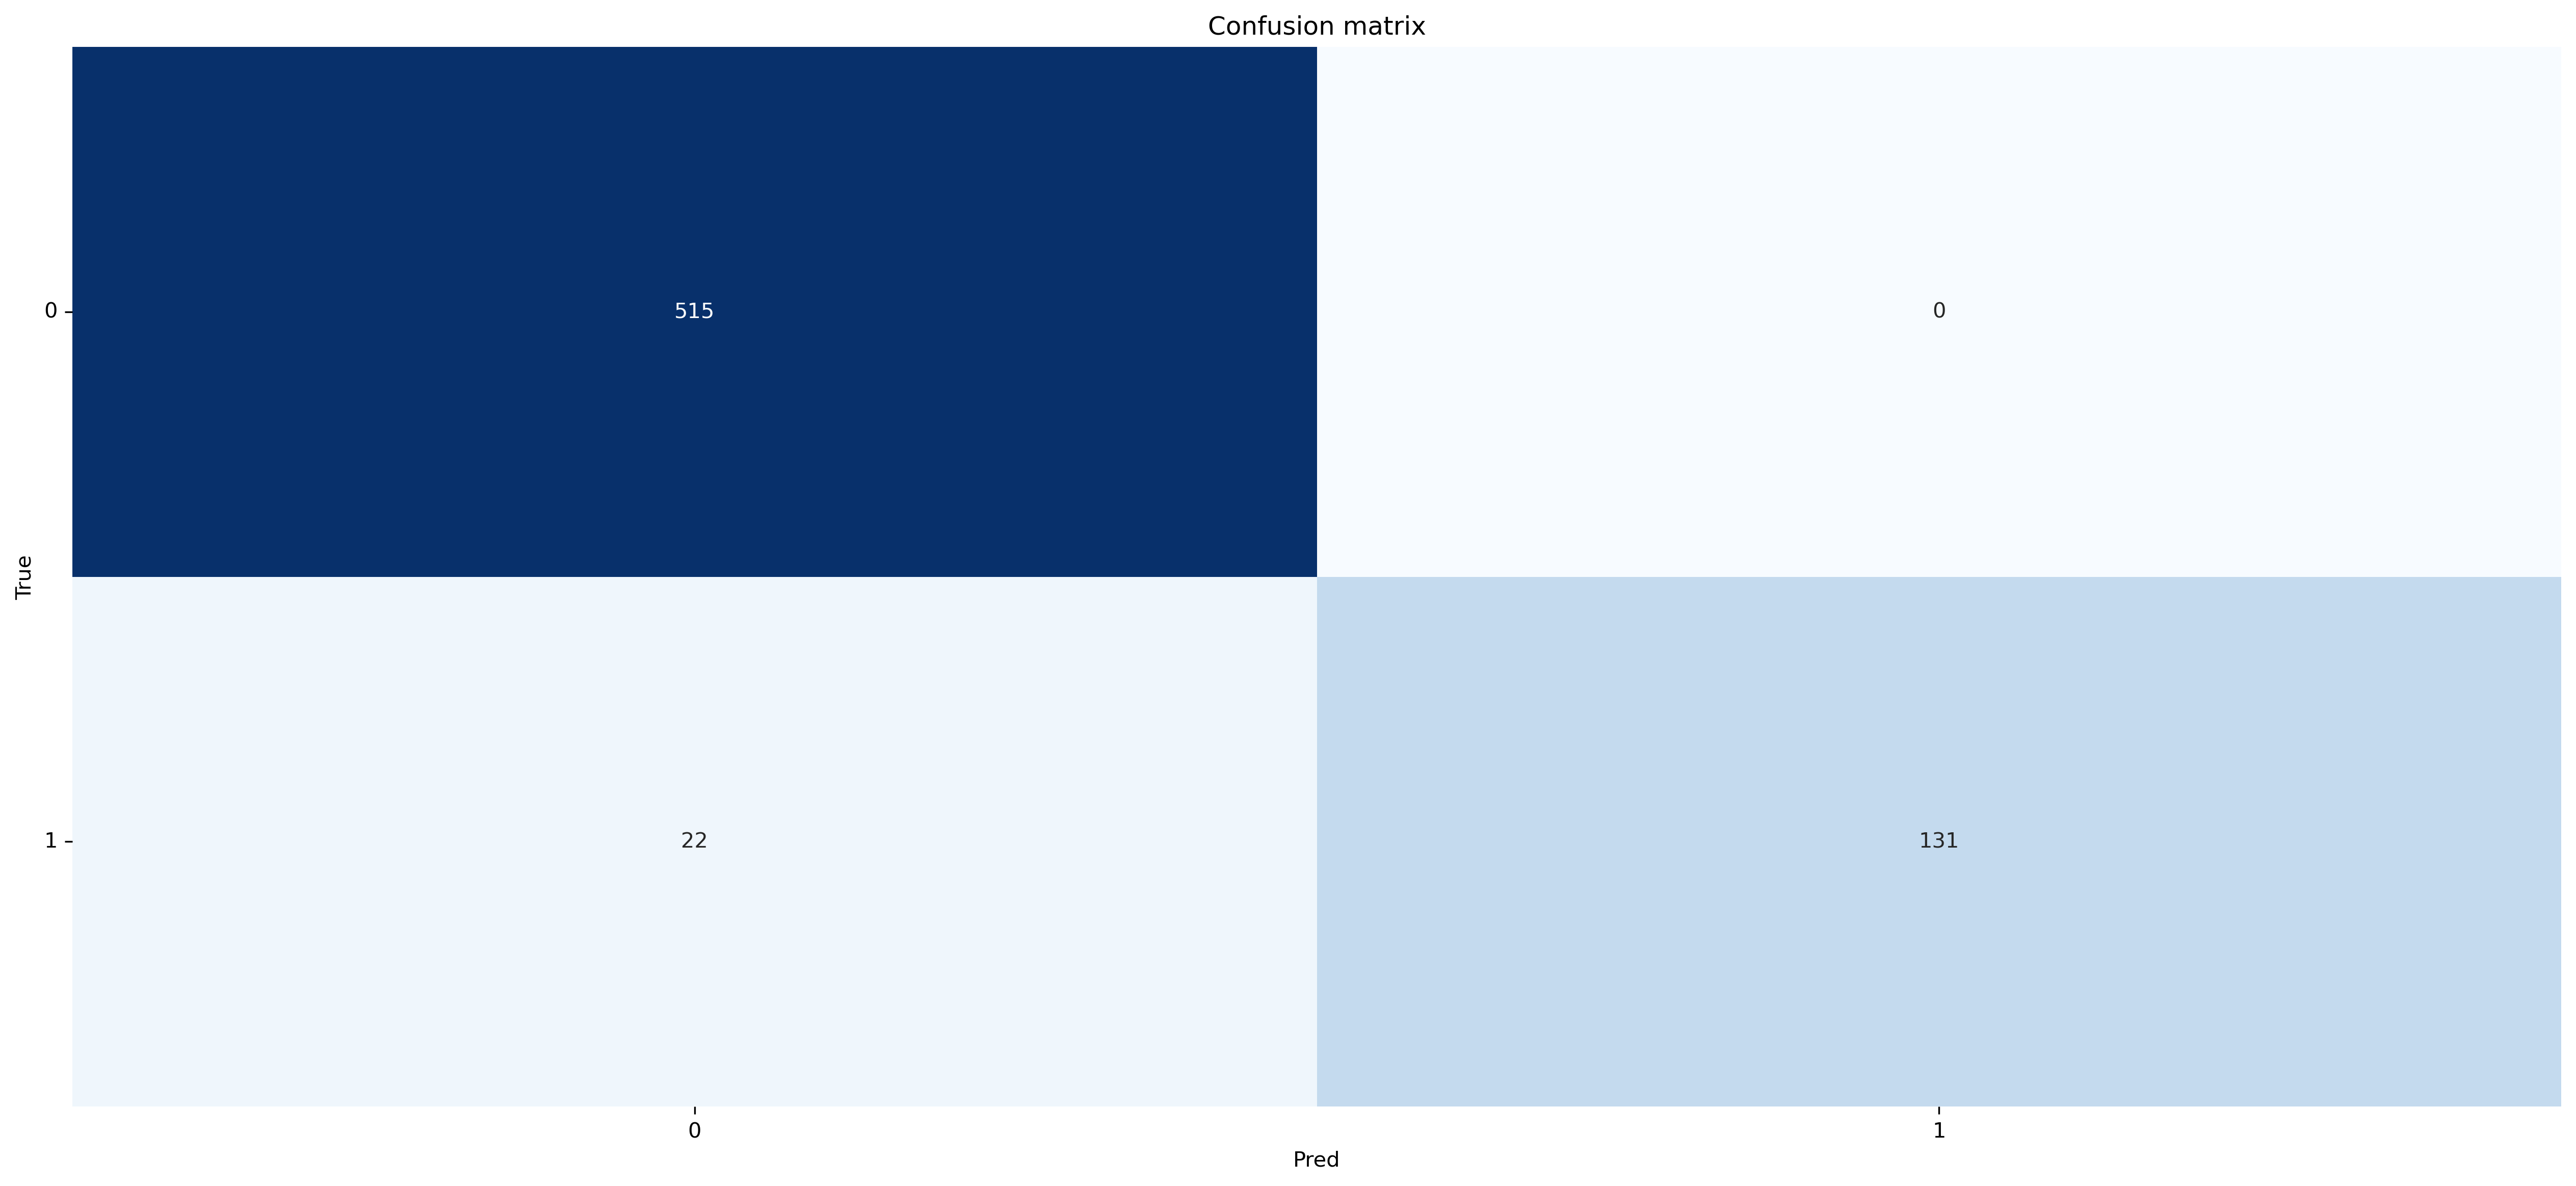

In [13]:
def tf_idf_logistic_regression(df_train,df_test,y_train,y_test):
    v = feature_extraction.text.TfidfVectorizer(sublinear_tf=True, ngram_range=(1,2))
    clf = LogisticRegression(n_jobs = -1)
    corpus = df_train['clean_text']
    v.fit(corpus)
    X_train = v.transform(corpus)
    X_test = v.transform(df_test['clean_text'])
    clf.fit(X_train,y_train)


    predicted = clf.predict(X_test)
    predicted_prob = clf.predict_proba(X_test)
    y_test1 = y_test.reshape(-1,1).flatten()

    classes = np.unique(y_test1)
    y_test_array = pd.get_dummies(y_test1, drop_first=False).values
        
    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test1, predicted)
    auc = metrics.roc_auc_score(y_test_array, predicted_prob)
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print("Detail:")
    print(metrics.classification_report(y_test1, predicted))
        
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test1, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
        yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    return metrics.classification_report(y_test1, predicted,output_dict=True)

metrics_tf_idf_lr = tf_idf_logistic_regression(X_train,X_test,y_train,y_test)

Accuracy: 1.0
Auc: 1.0
Detail:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       515
           1       1.00      0.99      1.00       153

    accuracy                           1.00       668
   macro avg       1.00      1.00      1.00       668
weighted avg       1.00      1.00      1.00       668



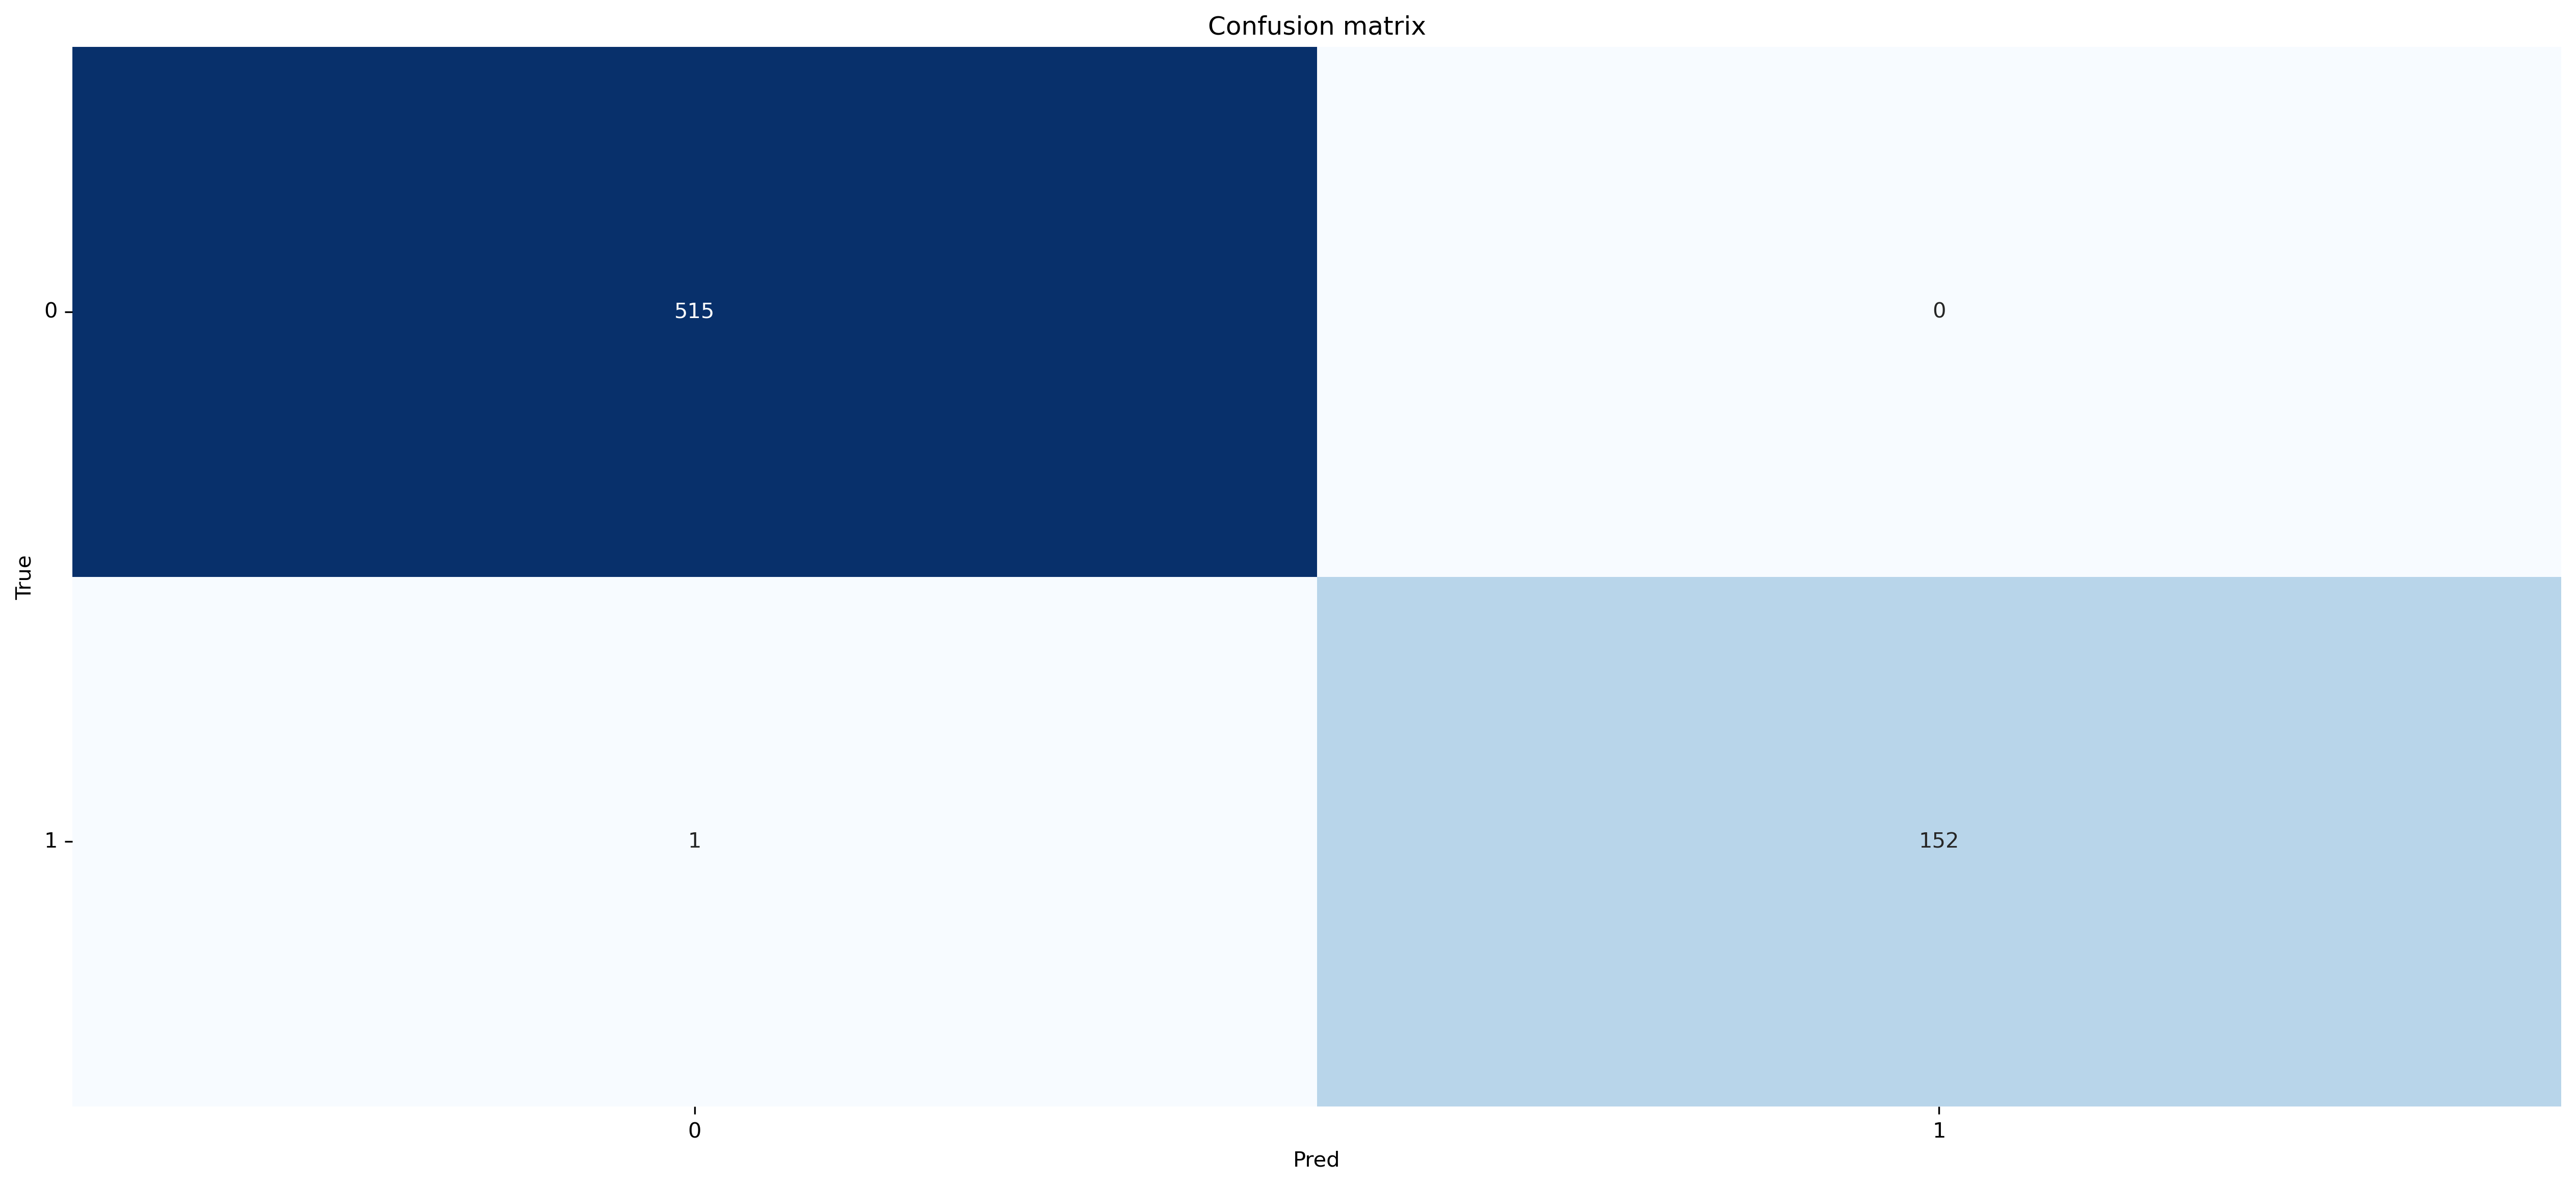

In [14]:
def count_vectorizer_logistic_regression(df_train,df_test,y_train,y_test):
    v = feature_extraction.text.CountVectorizer(ngram_range=(1,2))
    clf = LogisticRegression(n_jobs = -1)
    corpus = df_train['clean_text']
    v.fit(corpus)
    X_train = v.transform(corpus)
    X_test = v.transform(df_test['clean_text'])
    clf.fit(X_train,y_train)


    predicted = clf.predict(X_test)
    predicted_prob = clf.predict_proba(X_test)
    y_test1 = y_test.reshape(-1,1).flatten()

    classes = np.unique(y_test1)
    y_test_array = pd.get_dummies(y_test1, drop_first=False).values
        
    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test1, predicted)
    auc = metrics.roc_auc_score(y_test_array, predicted_prob)
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print("Detail:")
    print(metrics.classification_report(y_test1, predicted))
        
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test1, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
        yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    return metrics.classification_report(y_test1, predicted,output_dict=True)

metrics_cv_lr = count_vectorizer_logistic_regression(X_train,X_test,y_train,y_test)

###  d) Faça o mesmo para o classificador Naive-Bayes.

Accuracy: 0.98
Auc: 0.95
Detail:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       515
           1       1.00      0.90      0.94       153

    accuracy                           0.98       668
   macro avg       0.98      0.95      0.96       668
weighted avg       0.98      0.98      0.98       668



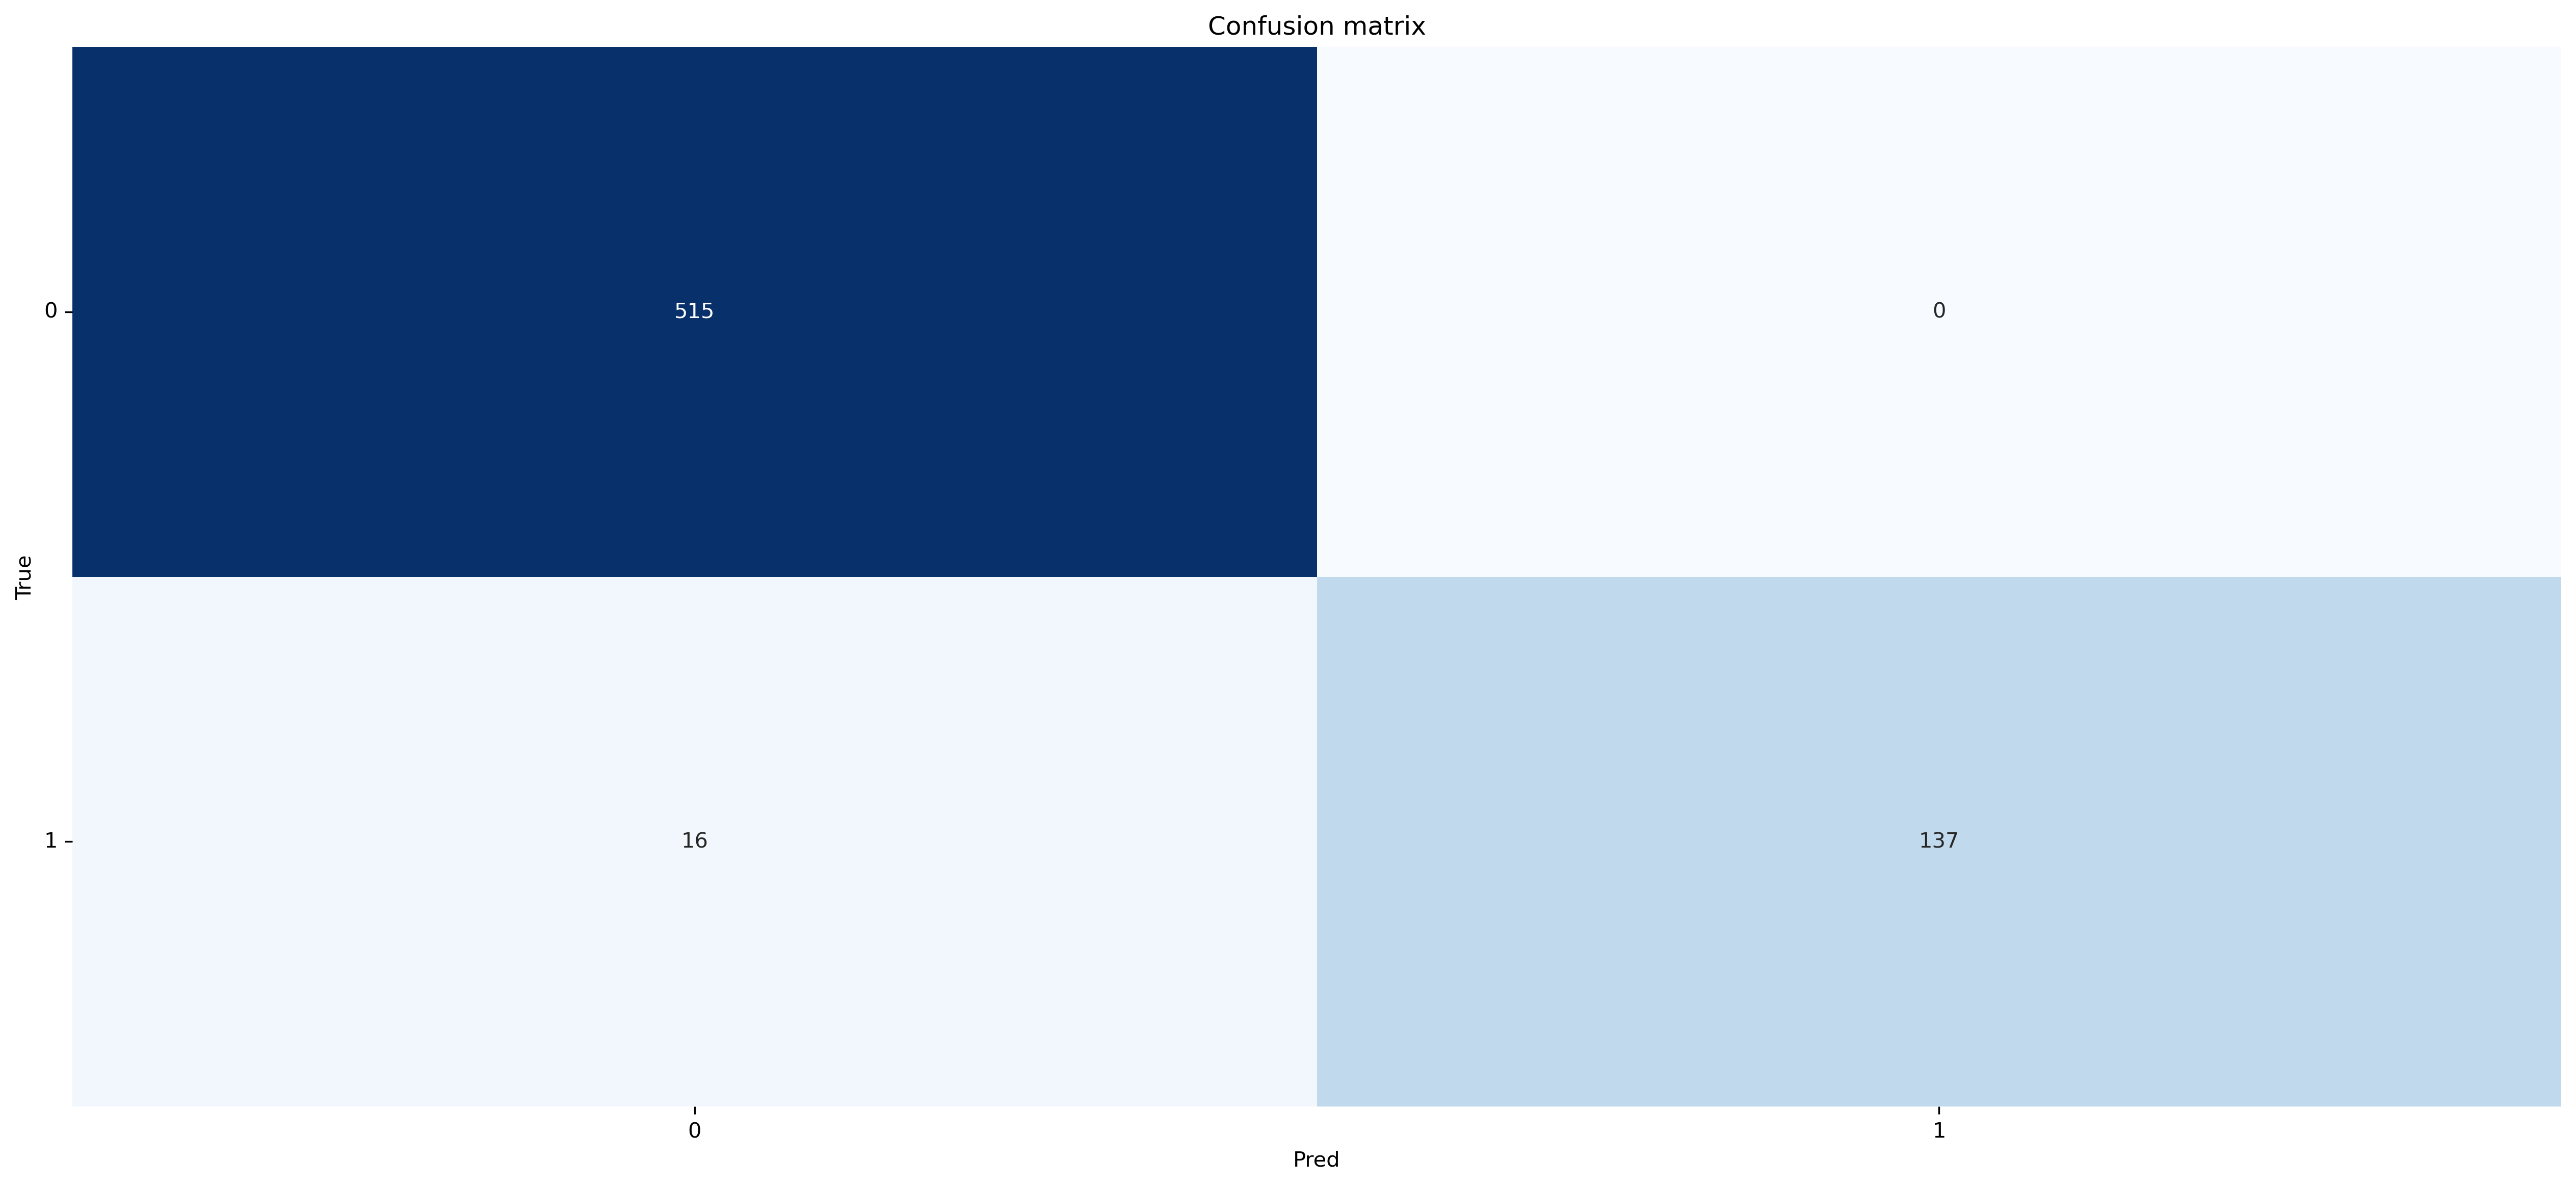

In [15]:
def tf_idf_naive_bayes(df_train,df_test,y_train,y_test):
    v = feature_extraction.text.TfidfVectorizer(sublinear_tf=True, ngram_range=(1,2))
    clf = GaussianNB()
    corpus = df_train['clean_text']
    v.fit(corpus)
    X_train = v.transform(corpus).toarray()
    X_test = v.transform(df_test['clean_text']).toarray()
    clf.fit(X_train,y_train)


    predicted = clf.predict(X_test)
    predicted_prob = clf.predict_proba(X_test)
    y_test1 = y_test.reshape(-1,1).flatten()

    classes = np.unique(y_test1)
    y_test_array = pd.get_dummies(y_test1, drop_first=False).values
        
    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test1, predicted)
    auc = metrics.roc_auc_score(y_test_array, predicted_prob)
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print("Detail:")
    print(metrics.classification_report(y_test1, predicted))
        
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test1, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
        yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    return metrics.classification_report(y_test1, predicted,output_dict=True)

metrics_tf_idf_nb = tf_idf_naive_bayes(X_train,X_test,y_train,y_test)

Accuracy: 0.98
Auc: 0.95
Detail:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       515
           1       0.98      0.92      0.95       153

    accuracy                           0.98       668
   macro avg       0.98      0.95      0.97       668
weighted avg       0.98      0.98      0.98       668



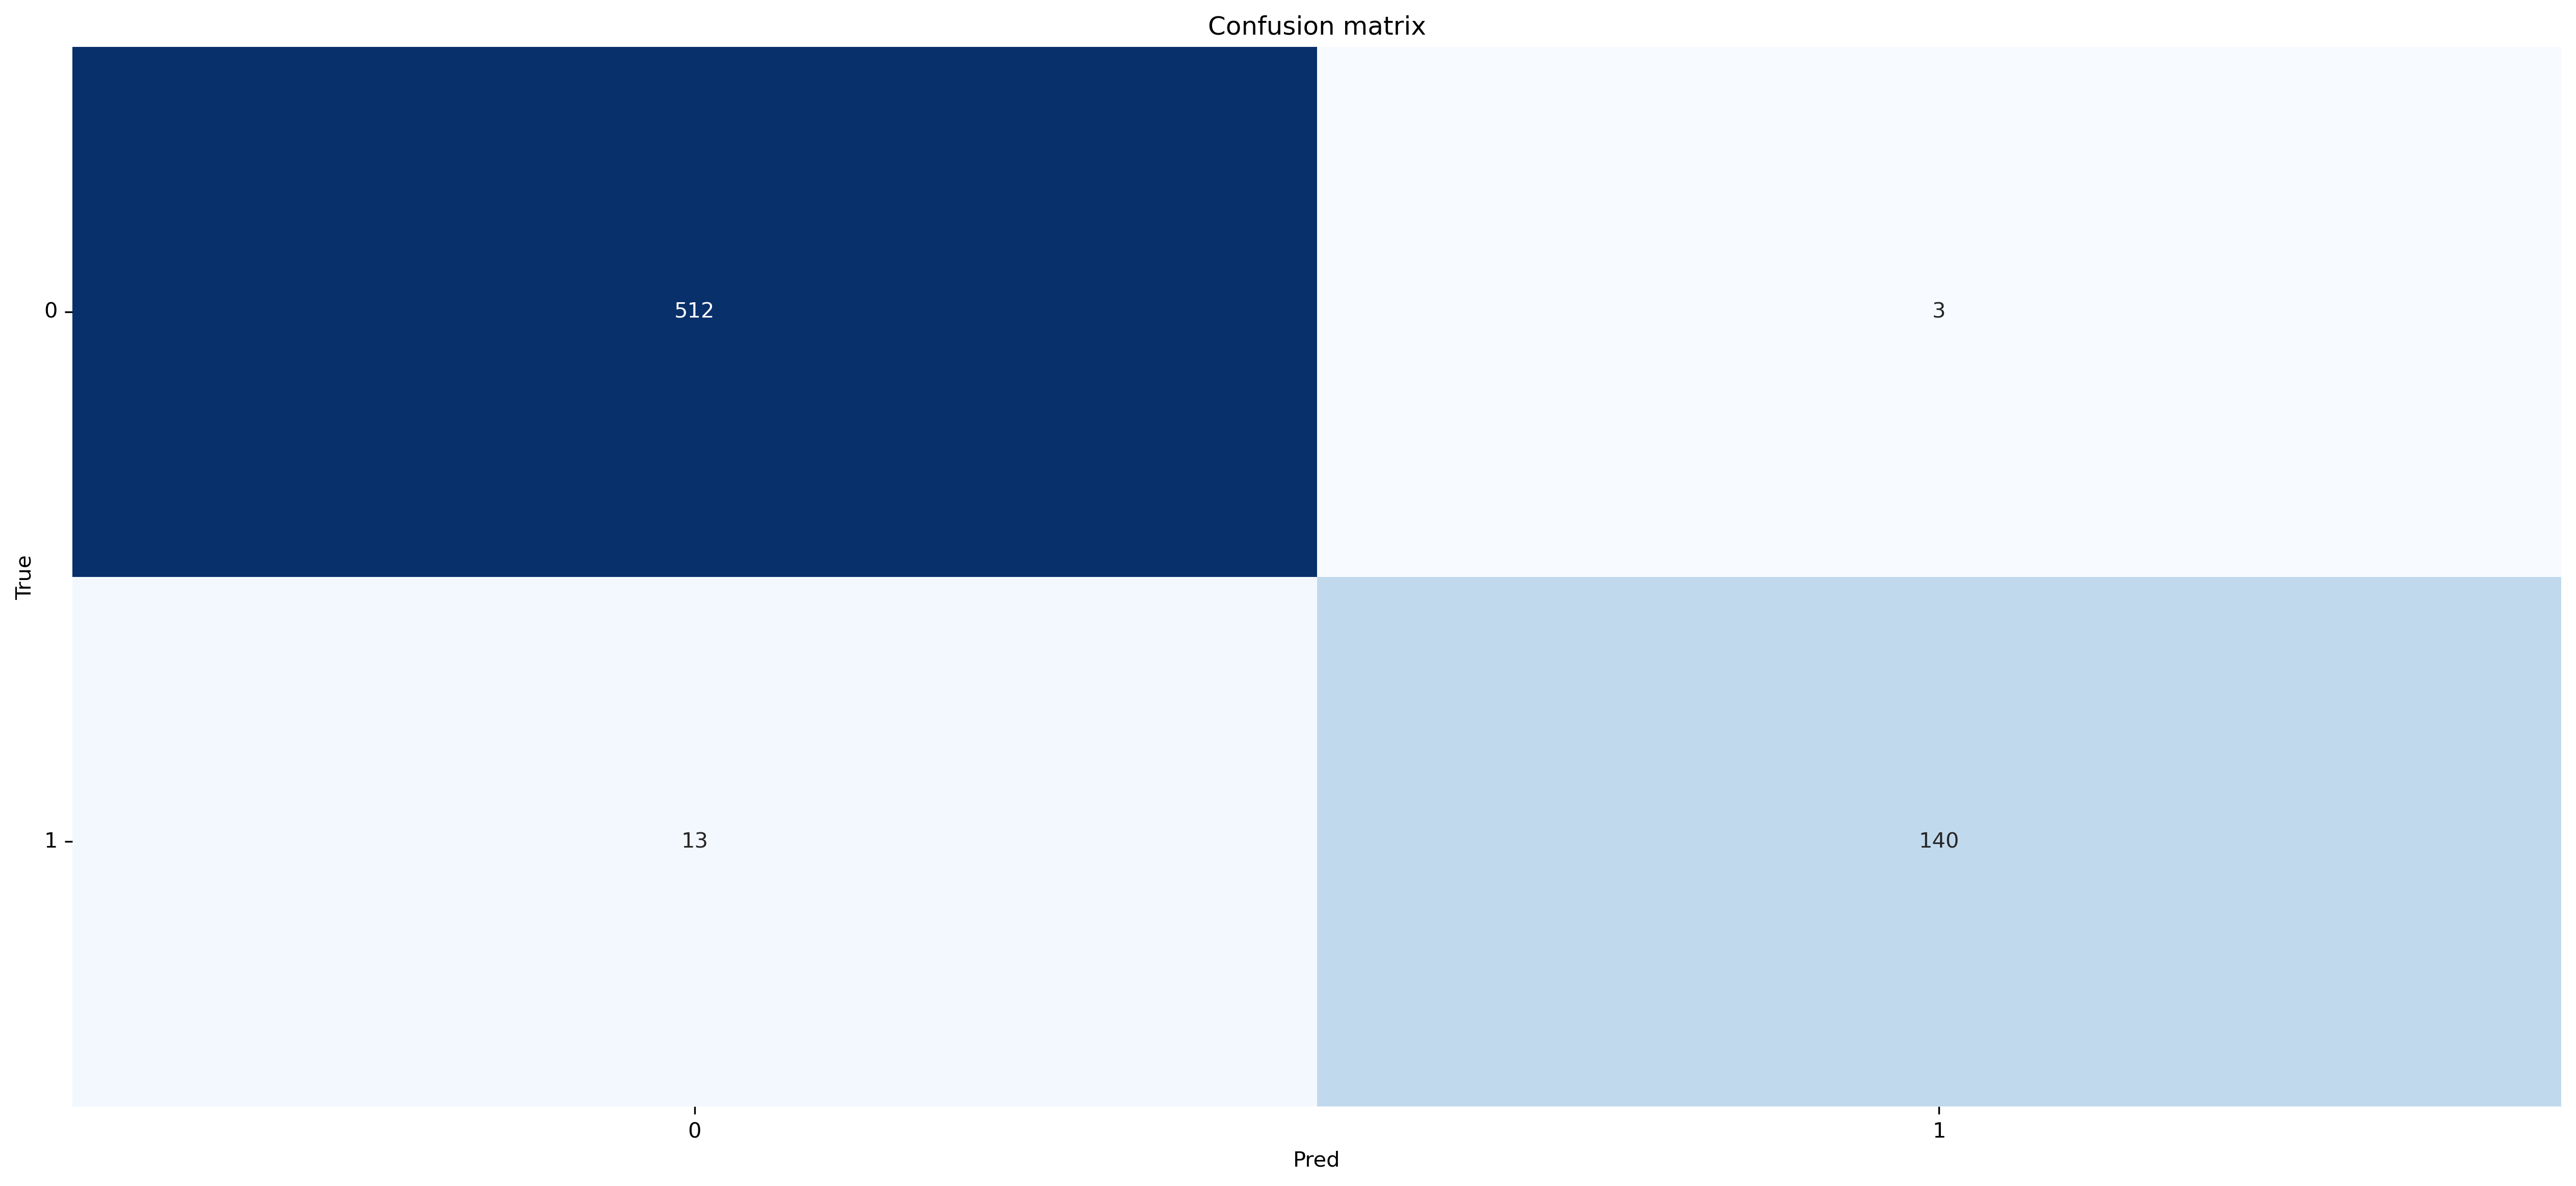

In [16]:
def count_vectorizer_naive_bayes(df_train,df_test,y_train,y_test):
    v = feature_extraction.text.CountVectorizer(ngram_range=(1,2))
    clf = GaussianNB()
    corpus = df_train['clean_text']
    v.fit(corpus)
    X_train = v.transform(corpus).toarray()
    X_test = v.transform(df_test['clean_text']).toarray()
    clf.fit(X_train,y_train)


    predicted = clf.predict(X_test)
    predicted_prob = clf.predict_proba(X_test)
    y_test1 = y_test.reshape(-1,1).flatten()

    classes = np.unique(y_test1)
    y_test_array = pd.get_dummies(y_test1, drop_first=False).values
        
    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test1, predicted)
    auc = metrics.roc_auc_score(y_test_array, predicted_prob)
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print("Detail:")
    print(metrics.classification_report(y_test1, predicted))
        
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test1, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
        yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    return metrics.classification_report(y_test1, predicted,output_dict=True)

metrics_cv_nb = count_vectorizer_naive_bayes(X_train,X_test,y_train,y_test)

### e) Faça o mesmo para um outro classificador de sua preferência (pesquise na biblioteca Scikit-learn).

Accuracy: 1.0
Auc: 1.0
Detail:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       515
           1       0.99      0.99      0.99       153

    accuracy                           1.00       668
   macro avg       0.99      0.99      0.99       668
weighted avg       1.00      1.00      1.00       668



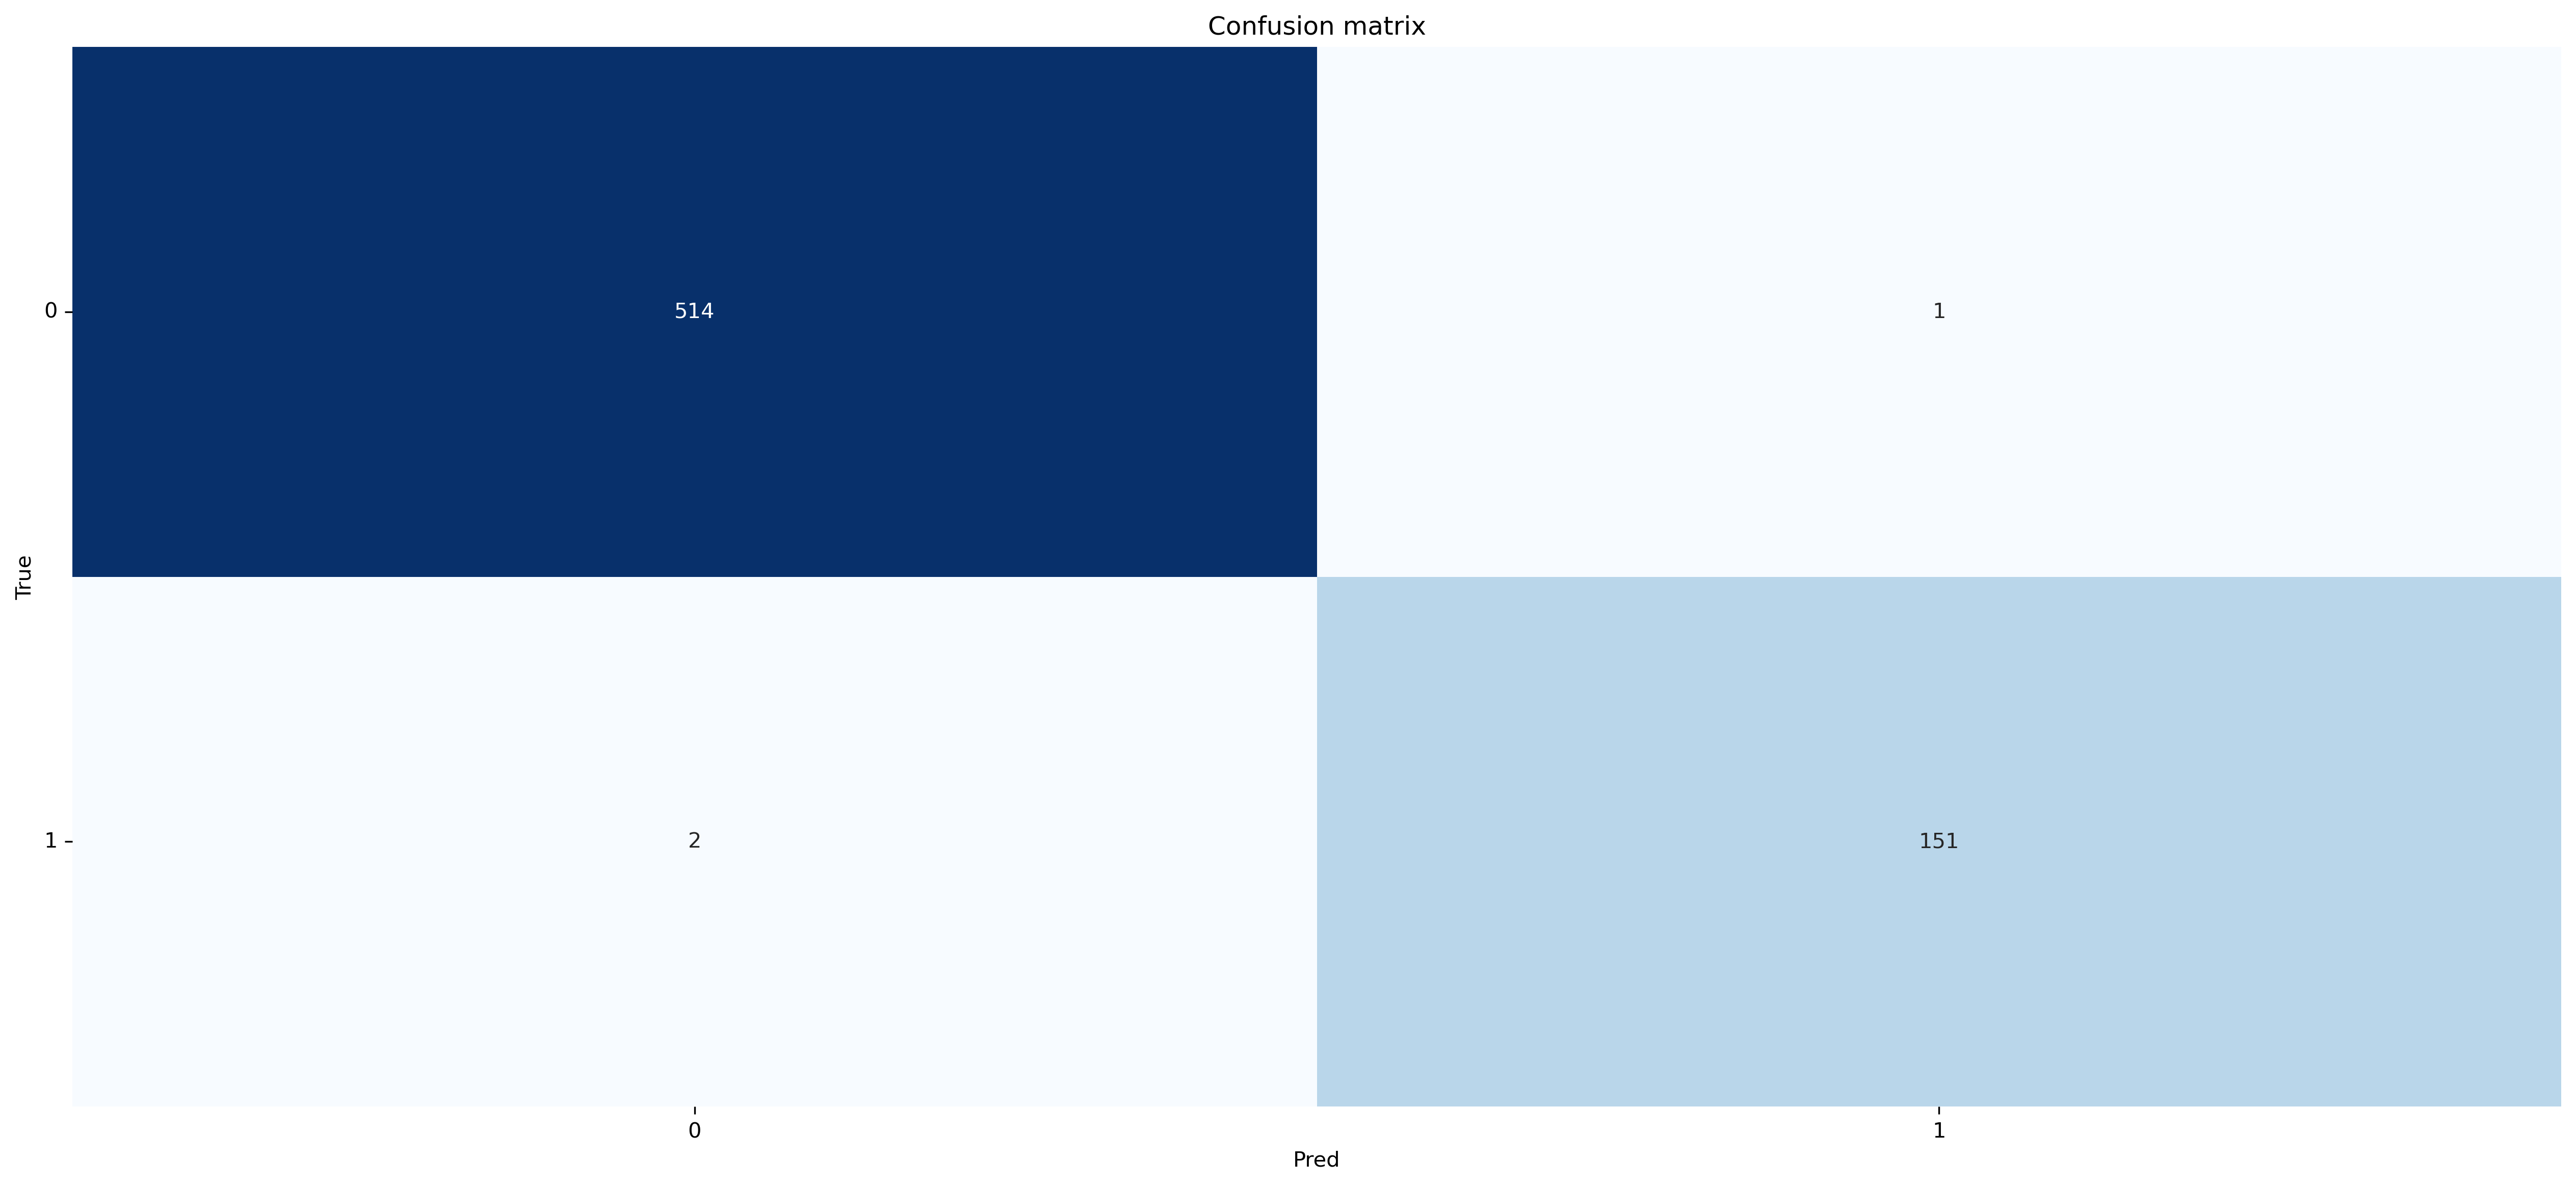

In [17]:
def tf_idf_sgd(df_train,df_test,y_train,y_test):
    v = feature_extraction.text.TfidfVectorizer(sublinear_tf=True, ngram_range=(1,2))
    clf = SGDClassifier(n_jobs=-1, loss = 'modified_huber')
    corpus = df_train['clean_text']
    v.fit(corpus)
    X_train = v.transform(corpus)
    X_test = v.transform(df_test['clean_text'])
    clf.fit(X_train,y_train)


    predicted = clf.predict(X_test)
    predicted_prob = clf.predict_proba(X_test)
    y_test1 = y_test.reshape(-1,1).flatten()

    classes = np.unique(y_test1)
    y_test_array = pd.get_dummies(y_test1, drop_first=False).values
        
    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test1, predicted)
    auc = metrics.roc_auc_score(y_test_array, predicted_prob)
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print("Detail:")
    print(metrics.classification_report(y_test1, predicted))
        
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test1, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
        yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    return metrics.classification_report(y_test1, predicted,output_dict=True)

metrics_tf_idf_sgd = tf_idf_sgd(X_train,X_test,y_train,y_test)

Accuracy: 0.99
Auc: 0.99
Detail:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       515
           1       0.99      0.98      0.99       153

    accuracy                           0.99       668
   macro avg       0.99      0.99      0.99       668
weighted avg       0.99      0.99      0.99       668



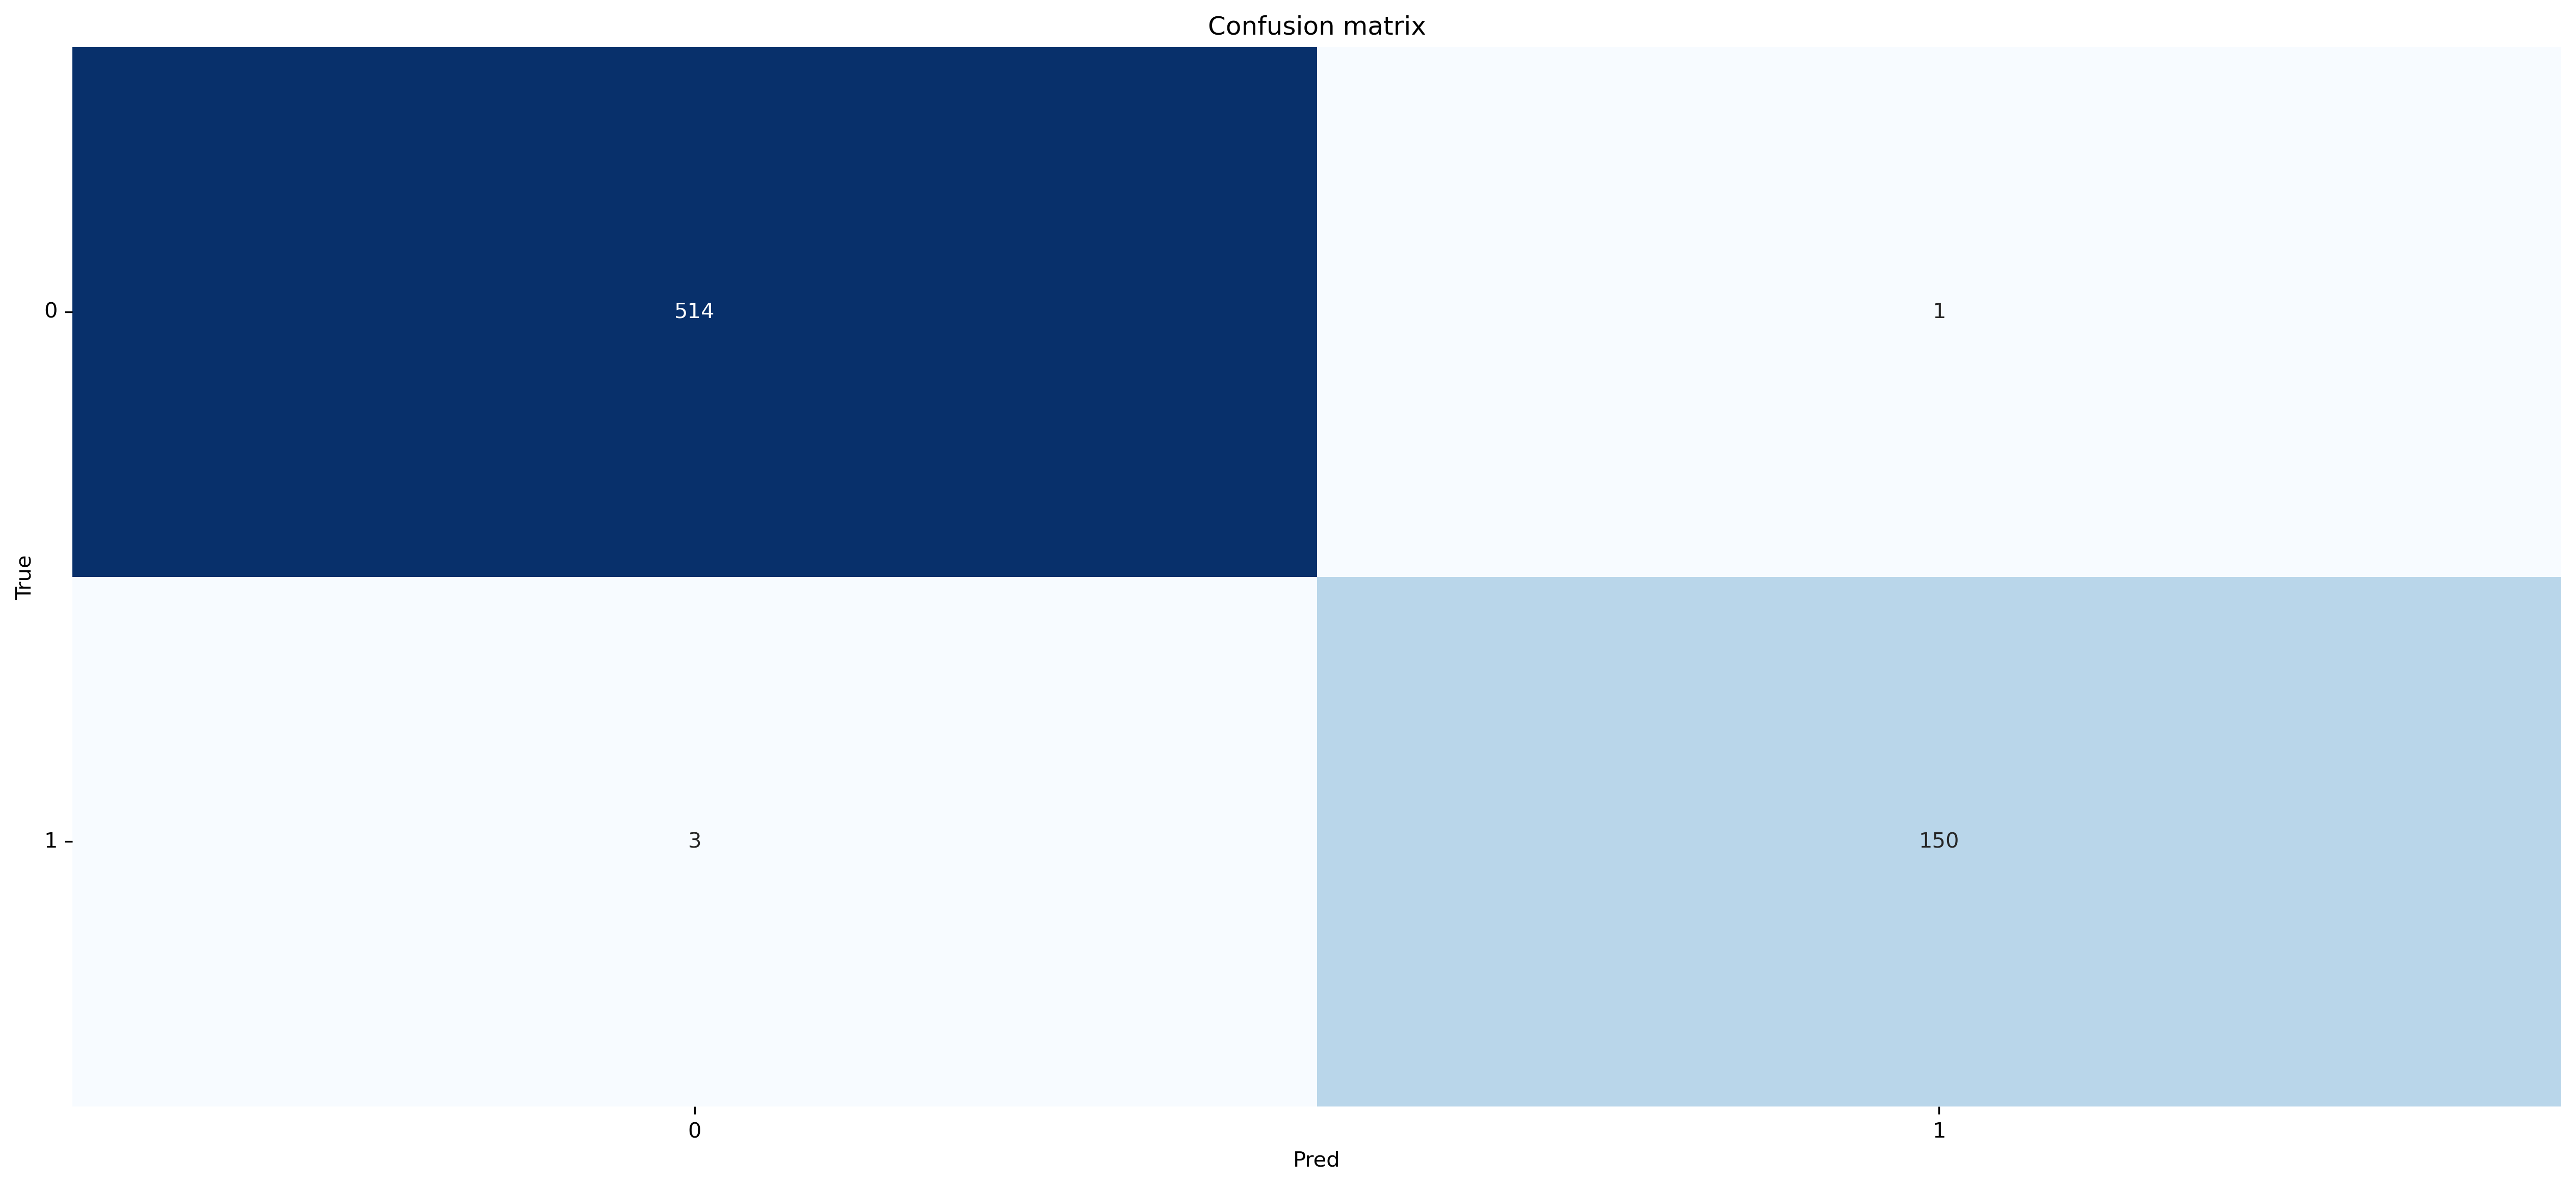

In [18]:
def count_vectorizer_sgd(df_train,df_test,y_train,y_test):
    v = feature_extraction.text.CountVectorizer(ngram_range=(1,2))
    clf = SGDClassifier(n_jobs=-1, loss = 'modified_huber')
    corpus = df_train['clean_text']
    v.fit(corpus)
    X_train = v.transform(corpus)
    X_test = v.transform(df_test['clean_text'])
    clf.fit(X_train,y_train)


    predicted = clf.predict(X_test)
    predicted_prob = clf.predict_proba(X_test)
    y_test1 = y_test.reshape(-1,1).flatten()

    classes = np.unique(y_test1)
    y_test_array = pd.get_dummies(y_test1, drop_first=False).values
        
    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test1, predicted)
    auc = metrics.roc_auc_score(y_test_array, predicted_prob)
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print("Detail:")
    print(metrics.classification_report(y_test1, predicted))
        
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test1, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
        yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    return metrics.classification_report(y_test1, predicted,output_dict=True)



metrics_cv_sgd = count_vectorizer_sgd(X_train,X_test,y_train,y_test)

### f) Compare os 6 resultados.

In [37]:
metric_list = [metrics_cv_lr,metrics_tf_idf_lr,metrics_cv_nb,metrics_tf_idf_nb,metrics_cv_sgd,metrics_tf_idf_sgd]
metrics = ['CountVectorizer_LogisticRegression','TF_IDF_LogisticRegression','CountVectorizer_NaiveBayes','TF_IDF_NaiveBayes','CountVectorizer_SGD','TF_IDF_SGD']

print('F1 Score de todas as 6 variações:')

for i, metric in enumerate(metric_list):
    print( metrics[i] + ' -> ' + str(metric['macro avg']['f1-score']))

F1 Score de todas as 6 variações:
CountVectorizer_LogisticRegression -> 0.9978756896853286
TF_IDF_LogisticRegression -> 0.9508113318695443
CountVectorizer_NaiveBayes -> 0.9652806652806654
TF_IDF_NaiveBayes -> 0.9647656095470429
CountVectorizer_SGD -> 0.991483068135455
TF_IDF_SGD -> 0.9936270690559857


Podemos ver que o desempenho de todos os algoritmos selecionados, para as duas formas de representação foi bastante satisfatório.

## 3 - Realize um comparativo entre os métodos LDA, SVD e NMF para realizar modelagem de tópicos. Para cada método:

https://towardsdatascience.com/e-commerce-reviews-analysis-902210726d47
https://github.com/khsio/project_fletcher/blob/master/notebooks/Project_Fletcher_TopicModeling_Clustering.ipynb

### a) empiricamente, tente identificar uma quantidade de tópicos adequada para seu problema. Exiba resultados que justifiquem a quantidade de tópicos escolhida;

In [19]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD

def tfidf_vectorizer_lda(df, n_topics):
    v = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2))
    corpus = df['clean_text']
    v.fit(corpus)
    X = v.transform(corpus)

    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42,
    learning_method='online')
    lda_data = lda.fit_transform(X)

    return lda,v.get_feature_names()

def tfidf_vectorizer_svd(df, n_topics):
    v = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2))
    corpus = df['clean_text']
    v.fit(corpus)
    X = v.transform(corpus)

    svd = TruncatedSVD(n_components=n_topics, n_iter=7, random_state=42)
    svd.fit(X)

    return svd, v.get_feature_names()

def tfidf_vectorizer_nmf(df, n_topics):
    v = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2))
    corpus = df['clean_text']
    v.fit(corpus)
    X = v.transform(corpus)

    nmf_tfidf = NMF(n_components=n_topics)
    nmf_tfidf_data = nmf_tfidf.fit_transform(X)

    return nmf_tfidf, v.get_feature_names()

def display_topics(model, feature_names, no_top_words=5, topic_names = None):
    for index, topic in enumerate(model.components_):
        if not topic_names or not topic_names[index]:
            print(f"\nTopic {index}")
        else:
            print(f"\nTopic {topic_names[index]}:")
        msg = ", ".join([f'{feature_names[i]} ({topic[i]:6.4f})' 
                             for i in topic.argsort()[:-no_top_words-1:-1]])
        print(msg)

lda, features_lda = tfidf_vectorizer_lda(df,5)
svd, features_svd = tfidf_vectorizer_svd(df,5)
nmf, features_nmf = tfidf_vectorizer_nmf(df,5)

print('Tópicos LDA:')
display_topics(lda, features_lda,5)
print('\n')
print('Tópicos SVD:')
display_topics(svd, features_svd,5)
print('\n')
print('Tópicos NMF:')
display_topics(nmf, features_nmf,5)



c:\Users\rafae\anaconda3\envs\PLN\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\rafae\anaconda3\envs\PLN\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\Users\rafae\anaconda3\envs\PLN\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Tópicos LDA:

Topic 0
fairmont (0.2511), savoy (0.2330), alwalee (0.2279), print alwalee (0.2277), simpson strand (0.2275)

Topic 1
boers (0.4353), deutsch boers (0.4317), euronext (0.3227), lse (0.3141), fiat (0.2330)

Topic 2
said (56.7719), us (42.8479), mr (36.8451), play (33.4311), gam (33.2023)

Topic 3
pric (0.2007), halifax (0.2006), niss (0.2006), lend (0.2006), hous pric (0.2006)

Topic 4
lvmh (0.2028), fal group (0.2020), lacroix (0.2019), christian lacroix (0.2010), haut (0.2010)


Tópicos SVD:

Topic 0
said (0.2064), mr (0.1619), us (0.1430), year (0.1118), would (0.1093)

Topic 1
mr (0.2521), labo (0.2201), elect (0.2153), blair (0.1782), party (0.1688)

Topic 2
mobl (0.1699), us (0.1562), phon (0.1445), econom (0.1219), firm (0.1031)

Topic 3
film (0.3795), award (0.2405), best (0.2076), nomin (0.1878), osc (0.1426)

Topic 4
econom (0.3011), bank (0.1395), rat (0.1373), grow (0.1330), pric (0.1086)


Tópicos NMF:

Topic 0
play (0.5833), gam (0.5552), win (0.3560), englan

5 tópicos é o número que trouxe os melhores resultados devido ao dataset original conter 5 classes.

### b)  identifique as 5 palavras mais relevantes de cada tópico;

In [20]:
print('Tópicos LDA:')
display_topics(lda, features_lda,5)
print('\n')
print('Tópicos SVD:')
display_topics(svd, features_svd,5)
print('\n')
print('Tópicos NMF:')
display_topics(nmf, features_nmf,5)

Tópicos LDA:

Topic 0
fairmont (0.2511), savoy (0.2330), alwalee (0.2279), print alwalee (0.2277), simpson strand (0.2275)

Topic 1
boers (0.4353), deutsch boers (0.4317), euronext (0.3227), lse (0.3141), fiat (0.2330)

Topic 2
said (56.7719), us (42.8479), mr (36.8451), play (33.4311), gam (33.2023)

Topic 3
pric (0.2007), halifax (0.2006), niss (0.2006), lend (0.2006), hous pric (0.2006)

Topic 4
lvmh (0.2028), fal group (0.2020), lacroix (0.2019), christian lacroix (0.2010), haut (0.2010)


Tópicos SVD:

Topic 0
said (0.2064), mr (0.1619), us (0.1430), year (0.1118), would (0.1093)

Topic 1
mr (0.2521), labo (0.2201), elect (0.2153), blair (0.1782), party (0.1688)

Topic 2
mobl (0.1699), us (0.1562), phon (0.1445), econom (0.1219), firm (0.1031)

Topic 3
film (0.3795), award (0.2405), best (0.2076), nomin (0.1878), osc (0.1426)

Topic 4
econom (0.3011), bank (0.1395), rat (0.1373), grow (0.1330), pric (0.1086)


Tópicos NMF:

Topic 0
play (0.5833), gam (0.5552), win (0.3560), englan

### c)  identifique os 3 tópicos mais relevantes de 5 documentos quaisquer (você pode representar os tópicos por suas 5 palavras mais relevantes).

In [21]:
documents = df.sample(n=5,random_state=23)
documents.reset_index(inplace=True)
documents

index filename                                title  \
0   1863  076.txt  Google launches TV search service\n   
1   1737  137.txt   Highbury tunnel players in clear\n   
2    586  307.txt  Carry On star Patsy Rowlands dies\n   
3    455  442.txt  Lesotho textile workers lose jobs\n   
4   1746  282.txt   Ferguson hails Man Utd's resolve\n   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 article  \
0  The net search giant Google has launched a search service that lets people look for TV programmes.\n\nThe service, Google Video beta, searches closed caption information that comes with programmes. It only searches US channel content currently. Results list programmes with still images and text from the point where the search phrase was spoken. It should expand over time to include content from more channels, said a Google spokesperson. The first version of the service is part of Google's expanding efforts to be a ubiquitous search engine for people to find what they want on the web and beyond. "We think TV is a big part of people's lives," said Jonathan Rosenberg, Google's vice president of product management. "Ultimately, we would like to have all TV programming indexed."\n\nGoogle Video has been indexing US-based programmes from PBS, the NBA, Fox News, and C-SPAN since December. But there were few clues from Google about when more global broadcasters would be included. "Over time, we plan to increase the number of television channels and video content available via Google Video but don't have more product details to share with you today," a Google spokesperson told the BBC News website.\n\nThe results thrown up by the search will also include programme and episode information like channel, date and time. It also lets people find the next time and channel where a programme will aired locally using a US zip code search function. Rival search engine Yahoo has been developing a similar type of video search for webcasts and TV clips which it promotes from its homepage. It offers direct links to websites with movie

In [22]:
algorithm_list = ['LDA','SVD','NMF']

def get_top_words(topic, n, words, algorithm):
    sorted_idxs = np.argsort(algorithm.components_[topic])
    top_words = [words[i] for i in sorted_idxs]
    return [w for w in reversed(top_words[-n:])]

for index, decomposition_algorithm in enumerate((LatentDirichletAllocation, TruncatedSVD, NMF)):
    algorithm = decomposition_algorithm(n_components=5)
    v = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2))
    corpus = df['clean_text']
    v.fit(corpus)
    X = v.transform(corpus)
    X_topics = algorithm.fit_transform(X)

    print(f'Algoritmo: {algorithm_list[index]} ')
    for i in range(5):
        print(f'Tópico {i} -> {get_top_words(i, 5, v.get_feature_names_out(), algorithm)}')
    print('\n')

    document_topics = algorithm.transform(v.transform(documents['clean_text']))

    for i, document in documents.iterrows():
        print(document['title'] + '\n' + document['article'][:100] + '...')
        print(document_topics[i])
        print('\n')

Algoritmo: LDA 
Tópico 0 -> ['said', 'us', 'play', 'mr', 'year']
Tópico 1 -> ['said', 'mr', 'us', 'gam', 'year']
Tópico 2 -> ['said', 'us', 'year', 'mr', 'play']
Tópico 3 -> ['said', 'mr', 'elect', 'us', 'labo']
Tópico 4 -> ['said', 'film', 'us', 'year', 'phon']


Google launches TV search service

The net search giant Google has launched a search service that lets people look for TV programmes.

...
[0.01269699 0.01293887 0.0127296  0.94901043 0.0126241 ]


Highbury tunnel players in clear

The Football Association has said it will not be bringing charges over the tunnel incident prior to ...
[0.01339786 0.01362022 0.94626814 0.01339211 0.01332167]


Carry On star Patsy Rowlands dies

Actress Patsy Rowlands, known to millions for her roles in the Carry On films, has died at the age o...
[0.01259061 0.0129913  0.01255532 0.01266455 0.94919822]


Lesotho textile workers lose jobs

Six foreign-owned textile factories have closed in Lesotho, leaving 6,650 garment workers jobless, u...
[0.

c:\Users\rafae\anaconda3\envs\PLN\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Algoritmo: NMF 
Tópico 0 -> ['play', 'gam', 'win', 'england', 'champ']
Tópico 1 -> ['mr', 'labo', 'elect', 'blair', 'party']
Tópico 2 -> ['us', 'mobl', 'phon', 'peopl', 'technolog']
Tópico 3 -> ['film', 'award', 'best', 'nomin', 'osc']
Tópico 4 -> ['econom', 'grow', 'bank', 'said', 'rat']


Google launches TV search service

The net search giant Google has launched a search service that lets people look for TV programmes.

...
[0.         0.         0.10751116 0.00791218 0.        ]


Highbury tunnel players in clear

The Football Association has said it will not be bringing charges over the tunnel incident prior to ...
[0.0601718  0.0027268  0.00591646 0.         0.        ]


Carry On star Patsy Rowlands dies

Actress Patsy Rowlands, known to millions for her roles in the Carry On films, has died at the age o...
[0.01583464 0.00623921 0.00908112 0.08100313 0.00203801]


Lesotho textile workers lose jobs

Six foreign-owned textile factories have closed in Lesotho, leaving 6,650 garmen

### d) qual método apresentou melhores resultados, na sua opinião? Justifique com resultados/dados.

Como os resultados acima mostram, podemos ver que o NMF trouxe uma melhor separação em tópicos do que os outros dois algoritmos. O LDA teve o pior desempenho, não conseguindo discernir muito bem as características de cada tópico. Cada tópico escolhido pelo NMF pode ser associado a uma classe real do dataset. Por exemplo, a notícia número 1 tem as palavras mais associadas ao tópico de tecnologia (tópico 2) e de fato é uma notícia que é classificada como notícia de tecnologia no dataset original.

## 4 - Realize um agrupamento dos dados usando a representação do CountVectorizer, seguindo os seguintes passos:

### a) Aplique o algoritmo PCA, preservando 95% da variância nos dados. Qual a dimensão resultante dos dados projetados?

In [7]:
from sklearn.decomposition import PCA

def count_vectorizer_pca(df):
    v = feature_extraction.text.CountVectorizer(ngram_range=(1,2))
    corpus = df['clean_text']
    v.fit(corpus)
    X = v.transform(corpus).toarray()

    pca = PCA(n_components=0.95, svd_solver = 'full')
    data_95 = pca.fit_transform(X)
    return data_95



In [8]:
PCA_data = count_vectorizer_pca(df)

In [9]:
display(PCA_data.shape)

(2225, 1529)

In [10]:
# Transform PCA result to sparse matrix
from scipy import sparse
PCA_data_sparse = sparse.csr_matrix(PCA_data)

In [ ]:
display(PCA_data_sparse.shape)

(2225, 1529)

Dimensão: (2225, 1529)

### b) Aplique um algoritmo k-means nos dados projetados, tentando usar o método elbow para encontrar o valor de k ótimo.

In [ ]:
from sklearn.cluster import KMeans

n_cluster = []
inertias = []
def count_vectorizer_cluster(PCA_data):
    for n_clus in range(1, 31, 2):
        print("Current cluster amount =", n_clus)
        n_cluster.append(n_clus)
        km = KMeans(n_clusters=n_clus,random_state=42)
        # Note: similarity in KMeans determined by Euclidean distance
        km.fit(PCA_data)
        inertias.append(km.inertia_)
    return (n_cluster, inertias)

In [ ]:
n_cluster, inertias = count_vectorizer_cluster(PCA_data_sparse)

Current cluster amount = 1
Current cluster amount = 3
Current cluster amount = 5
Current cluster amount = 7
Current cluster amount = 9
Current cluster amount = 11
Current cluster amount = 13
Current cluster amount = 15
Current cluster amount = 17
Current cluster amount = 19
Current cluster amount = 21
Current cluster amount = 23
Current cluster amount = 25
Current cluster amount = 27
Current cluster amount = 29


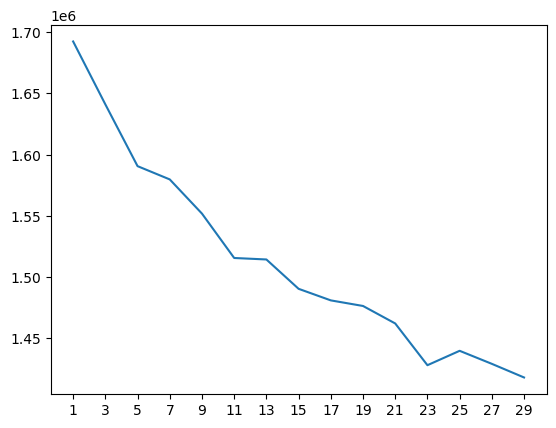

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(n_cluster, inertias)
plt.xticks(ticks=n_cluster, labels=n_cluster)
plt.show()

TEste 2

c:\Users\Alvaro\anaconda3\envs\pln_umap\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\Alvaro\anaconda3\envs\pln_umap\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\Alvaro\anaconda3\envs\pln_umap\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warn

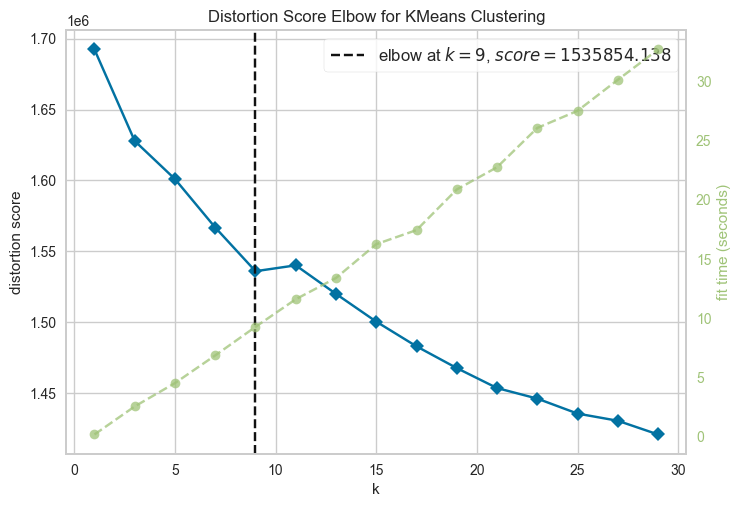

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KElbowVisualizer(KMeans(), k=range(1, 31, 2))
model.fit(PCA_data_sparse)
model.show()

O K ótimo encontrado é o K = 9.

## 5 - Nesta questão você deve aplicar métodos de projeção multidimensional para visualizar os dados da segunda questão no espaço visual.


### a) aplique os métodos de projeção multidimensional t-SNE e UMAP na representação CountVectorizer e plote os gráficos das projeções resultantes, colorindo os pontos de acordo com os grupos obtidos pelo k-means (questão 4b).

In [4]:
from sklearn.cluster import KMeans
def count_vectorizer_cluster_labels(PCA_data):
    clus = KMeans(n_clusters=9,random_state=42) # elbow gave K=9
    # Note: similarity in KMeans determined by Euclidean distance
    labels = clus.fit_predict(PCA_data)
    return labels

In [5]:
from sklearn.manifold import TSNE
import umap.umap_ as umap
print(umap)

def count_vectorizer_tSNE(df):
    v = feature_extraction.text.CountVectorizer(ngram_range=(1,2))
    corpus = df['clean_text']
    v.fit(corpus)
    X = v.transform(corpus)#.toarray()

    
    tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3, square_distances=True)
    data_tsne = tsne.fit_transform(X)
    return data_tsne
    
def count_vectorizer_UMAP(df):
    v = feature_extraction.text.CountVectorizer(ngram_range=(1,2))
    corpus = df['clean_text']
    v.fit(corpus)
    X = v.transform(corpus)#.toarray()

    
    umap_model = umap.UMAP(n_neighbors=5)
    umap_data = umap_model.fit_transform(X)
    return umap_data



c:\Users\Alvaro\anaconda3\envs\pln_umap\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'umap.umap_' from 'c:\\Users\\Alvaro\\anaconda3\\envs\\pln_umap\\lib\\site-packages\\umap\\umap_.py'>


In [11]:
data_label = count_vectorizer_cluster_labels(PCA_data_sparse)
data_tsne = count_vectorizer_tSNE(df)
data_umap = count_vectorizer_UMAP(df)

c:\Users\Alvaro\anaconda3\envs\pln_umap\lib\site-packages\sklearn\manifold\_t_sne.py:830: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(


In [12]:
print(data_label.shape)
print(data_tsne.shape)
print(data_umap.shape)

(2225,)
(2225, 2)
(2225, 2)


[Text(0.5, 1.0, 't-SNE')]

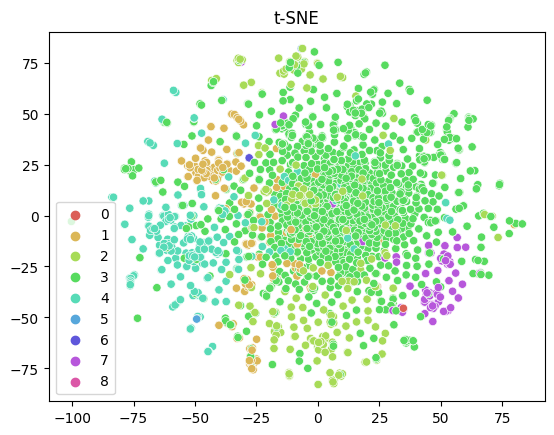

In [13]:
'''tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]'''
import seaborn as sns


sns.scatterplot(x=data_tsne[:,0],
y=data_tsne[:,1],palette=sns.color_palette("hls", 9),hue=data_label).set(title='t-SNE')

[Text(0.5, 1.0, 'UMAP')]

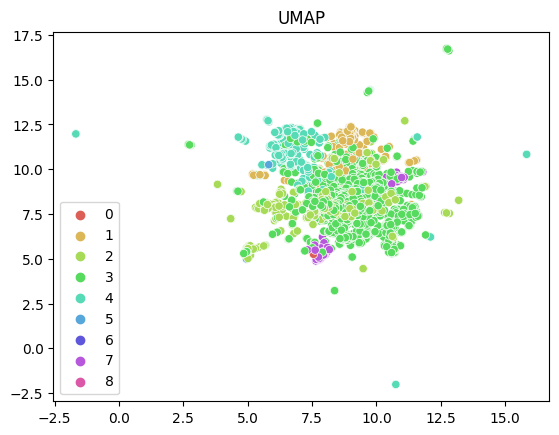

In [14]:

sns.scatterplot(x=data_umap[:,0],
y=data_umap[:,1],palette=sns.color_palette("hls", 9),hue=data_label).set(title='UMAP')

### b)  Experimente variar os hiperparâmetros perplexity do t-SNE e n neighbors do UMAP. O que acontece com as projeções quando estes parâmetros são calibrados para valores menores ou maiores do que seus valores padrão?

In [15]:
def count_vectorizer_tSNE_perp(df, perplexity):
    v = feature_extraction.text.CountVectorizer(ngram_range=(1,2))
    corpus = df['clean_text']
    v.fit(corpus)
    X = v.transform(corpus)#.toarray()

    
    tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=perplexity, square_distances=True)
    data_tsne = tsne.fit_transform(X)
    print(f"Perp = {perplexity}; Divergence = {tsne.kl_divergence_}")
    return data_tsne
    
def count_vectorizer_UMAP_n_neigh(df, n_neighbors):
    v = feature_extraction.text.CountVectorizer(ngram_range=(1,2))
    corpus = df['clean_text']
    v.fit(corpus)
    X = v.transform(corpus)#.toarray()

    
    umap_model = umap.UMAP(n_neighbors=n_neighbors)
    umap_data = umap_model.fit_transform(X)
    return umap_data

In [20]:
perplexities = [5, 20, 50, 100, 200, 300, 400, 500] # 
n_neighbours = [5, 20, 50, 100, 200, 300, 400, 500] # vai até 1/4 dos dados

tsnes = []
umaps = []

for perp in perplexities:
    print(perp)
    data = count_vectorizer_tSNE_perp(df, perp)
    tsnes.append(data)


for curr_n_neigh in n_neighbours:
    print(curr_n_neigh)
    data = count_vectorizer_UMAP_n_neigh(df, curr_n_neigh)
    umaps.append(data)
    



5


c:\Users\Alvaro\anaconda3\envs\pln_umap\lib\site-packages\sklearn\manifold\_t_sne.py:830: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(


Perp = 5; Divergence = 3.1484267711639404
20
Perp = 20; Divergence = 2.8940210342407227
50
Perp = 50; Divergence = 2.462832450866699
100
Perp = 100; Divergence = 1.9902408123016357
200
Perp = 200; Divergence = 1.4540530443191528
300
Perp = 300; Divergence = 1.1458628177642822
400
Perp = 400; Divergence = 0.9307686686515808
500
Perp = 500; Divergence = 0.7664037346839905
5
20
50
100
200
300
400
500


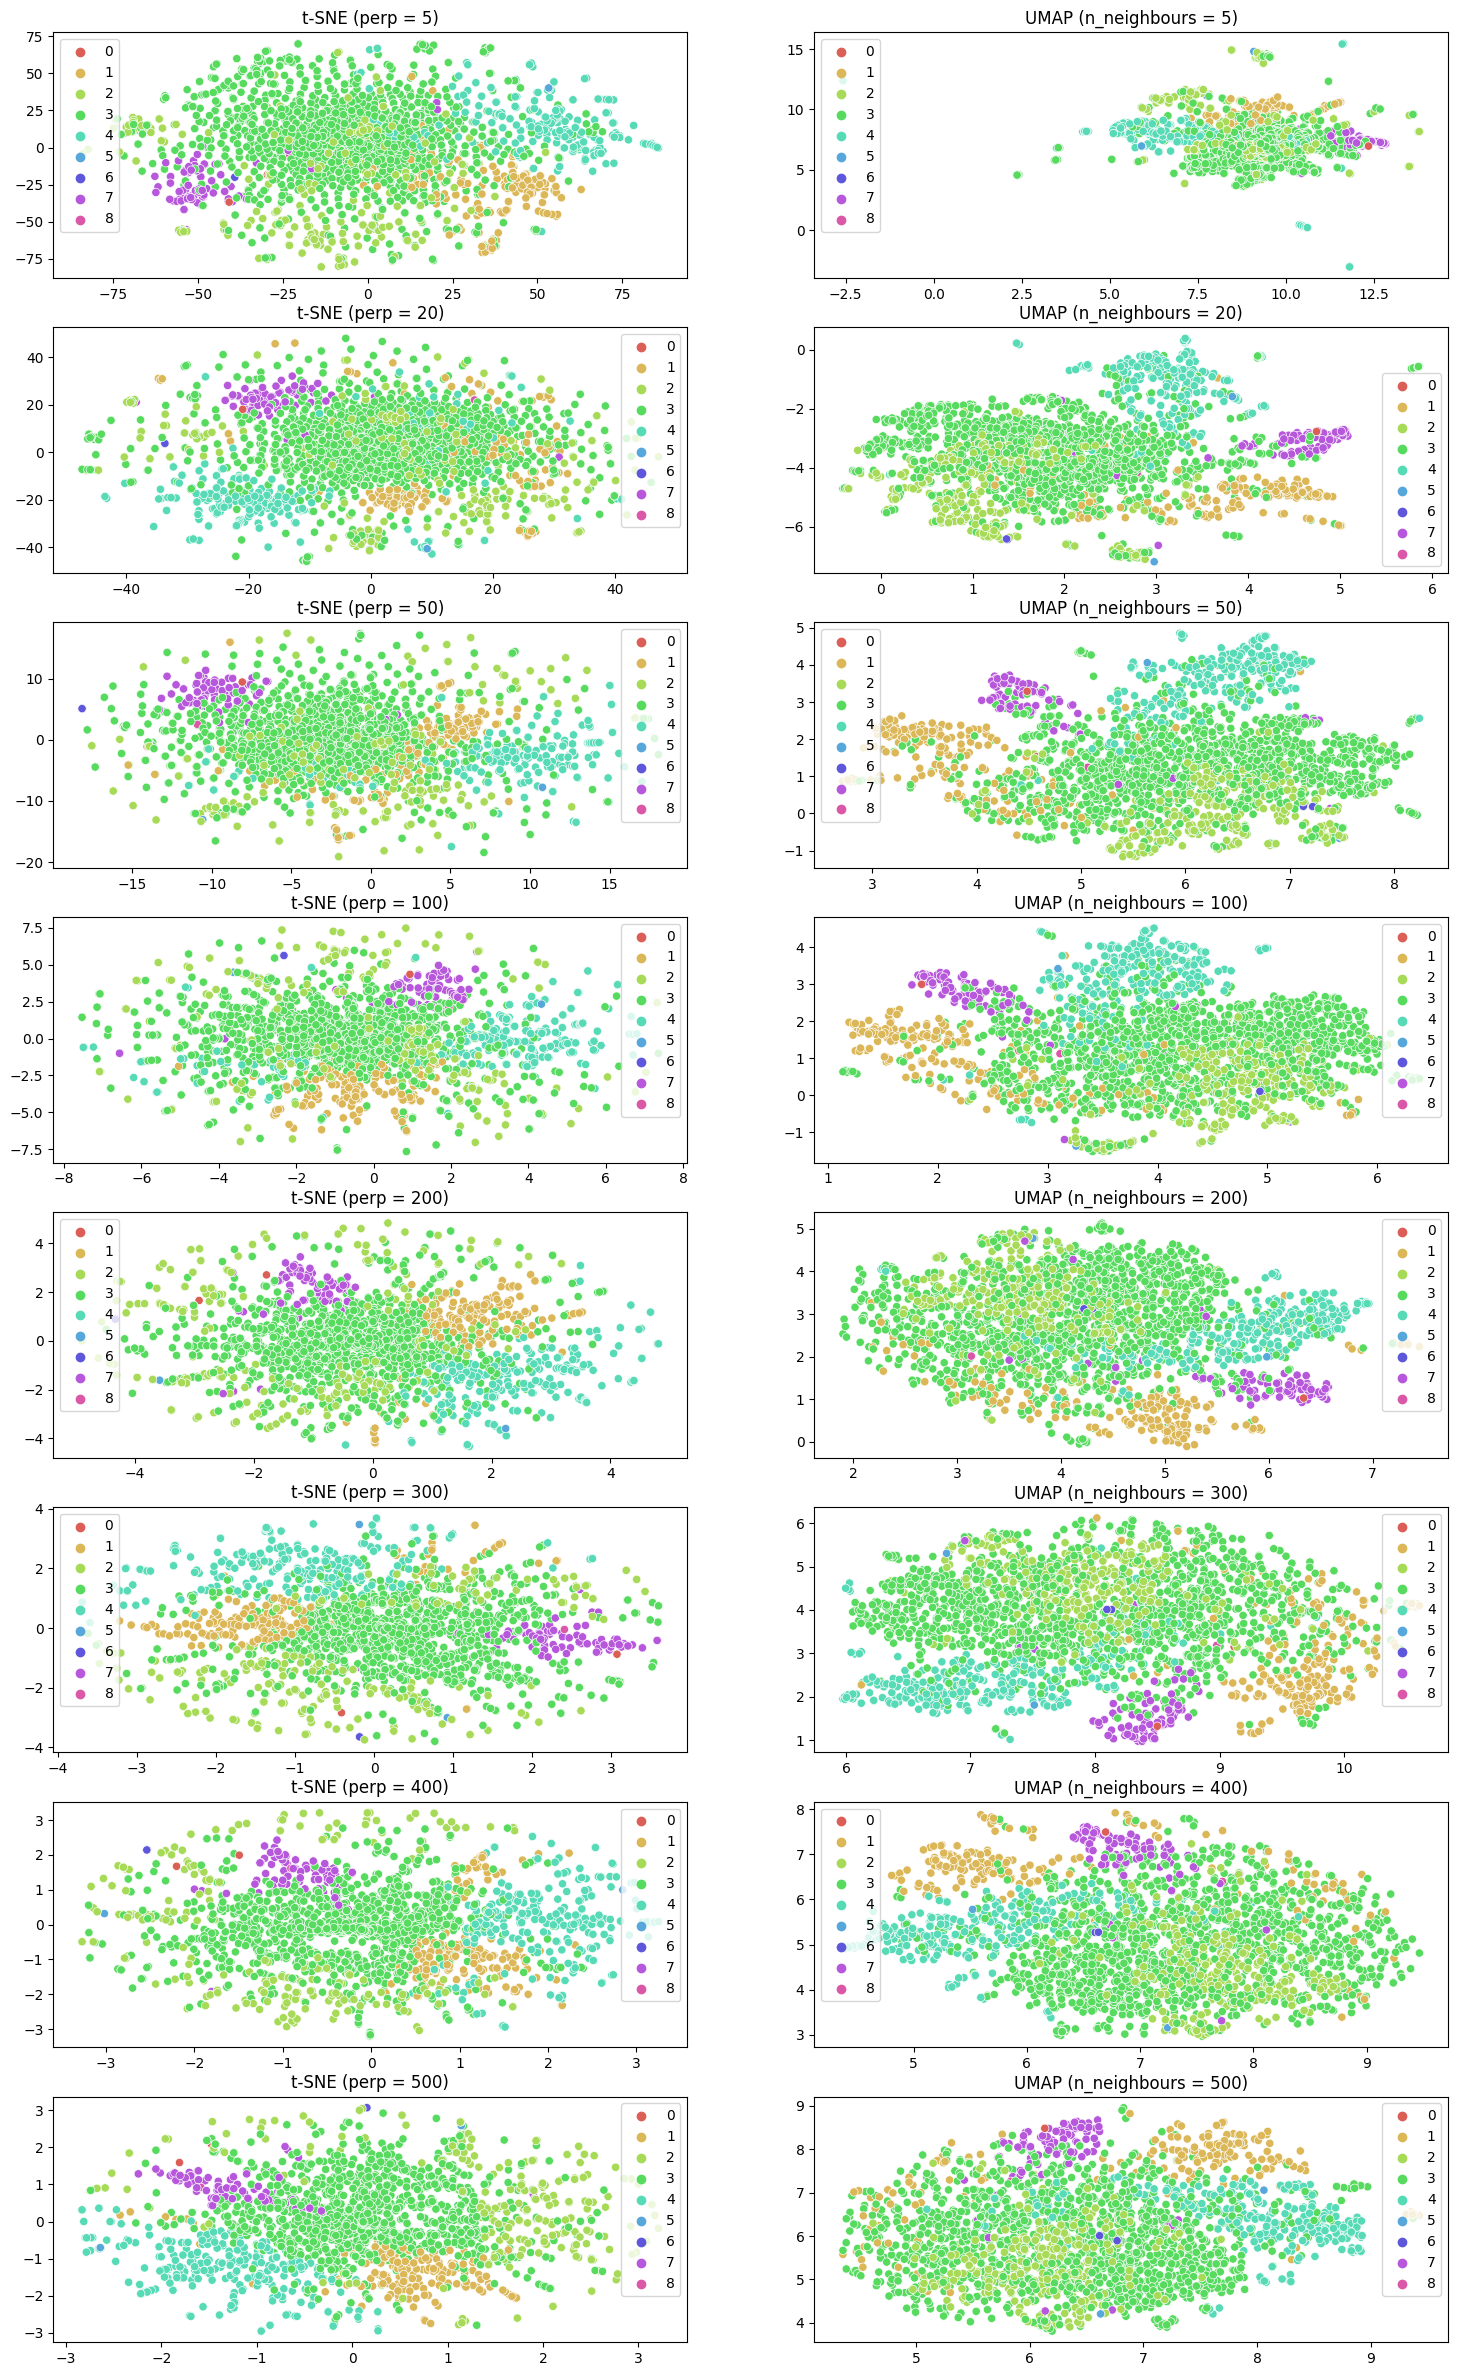

In [21]:

import matplotlib.pyplot as plt
fig, axes = plt.subplots(8, 2,figsize=(18, 30))

for i in range (0, 8):
    sns.scatterplot(ax=axes[i,0], x=tsnes[i][:,0],
    y=tsnes[i][:,1],palette=sns.color_palette("hls", 9),hue=data_label).set(title="t-SNE (perp = {})".format(perplexities[i]))
    sns.scatterplot(ax=axes[i,1], x=umaps[i][:,0],
    y=umaps[i][:,1],palette=sns.color_palette("hls", 9),hue=data_label).set(title="UMAP (n_neighbours = {})".format(n_neighbours[i]))

Podemos notar que ao aumentar o número de vizinhos no UMAP, ele começa a perder algumas informações mais detalhadas. Por exemplo, quando n_neighbours = 500 as classes 1, 2 e 3 acabam se misturando bastante. Enquanto que com n_neighbours=50 podemos visualizar melhor uma separação nas bordas dos clusters principais. Porém, quando diminuimos muito esse valor de n_neighbours, os pontos projetados ficam muito próximos no espaço e os grupos acabam tendo poucas diferenças.
Já quanto ao valor de perplexity do t-SNE, quanto menor seu valor, mais espalhado ficam os dados projetados. A medida que aumentamos, começamos a ver dados mais globais. Podemos notar que para perplexity=20, a classe 3 fica mais espalhada no espaço. Porém ao plotarmos para perplexity=500, conseguimos ver que a classe 3 é menos espalhada e consegue ser melhor distinguida.

### c) Usando os melhores valores encontrados para perplexity e n neighbors, compare o tempo de execução e a qualidade visual da projeção dos 2 métodos de projeção multidimensional (t-SNE e UMAP). Qual abordagem se saiu melhor em cada um desses aspectos?


In [22]:
import time
v = feature_extraction.text.CountVectorizer(ngram_range=(1,2))
corpus = df['clean_text']
v.fit(corpus)
X = v.transform(corpus)#.toarray()

    
    
start = time.time()
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=500, square_distances=True)
data_tsne = tsne.fit_transform(X)
duration = time.time() - start
print(duration)
    
    
start = time.time()
umap_model = umap.UMAP(n_neighbors=50)
umap_data = umap_model.fit_transform(X)
duration = time.time() - start
print(duration)

c:\Users\Alvaro\anaconda3\envs\pln_umap\lib\site-packages\sklearn\manifold\_t_sne.py:830: FutureWarning: The parameter `square_distances` has not effect and will be removed in version 1.3.
  warnings.warn(


49.35976266860962
5.403085708618164


[Text(0.5, 1.0, 'UMAP (n_neighbours = 50)')]

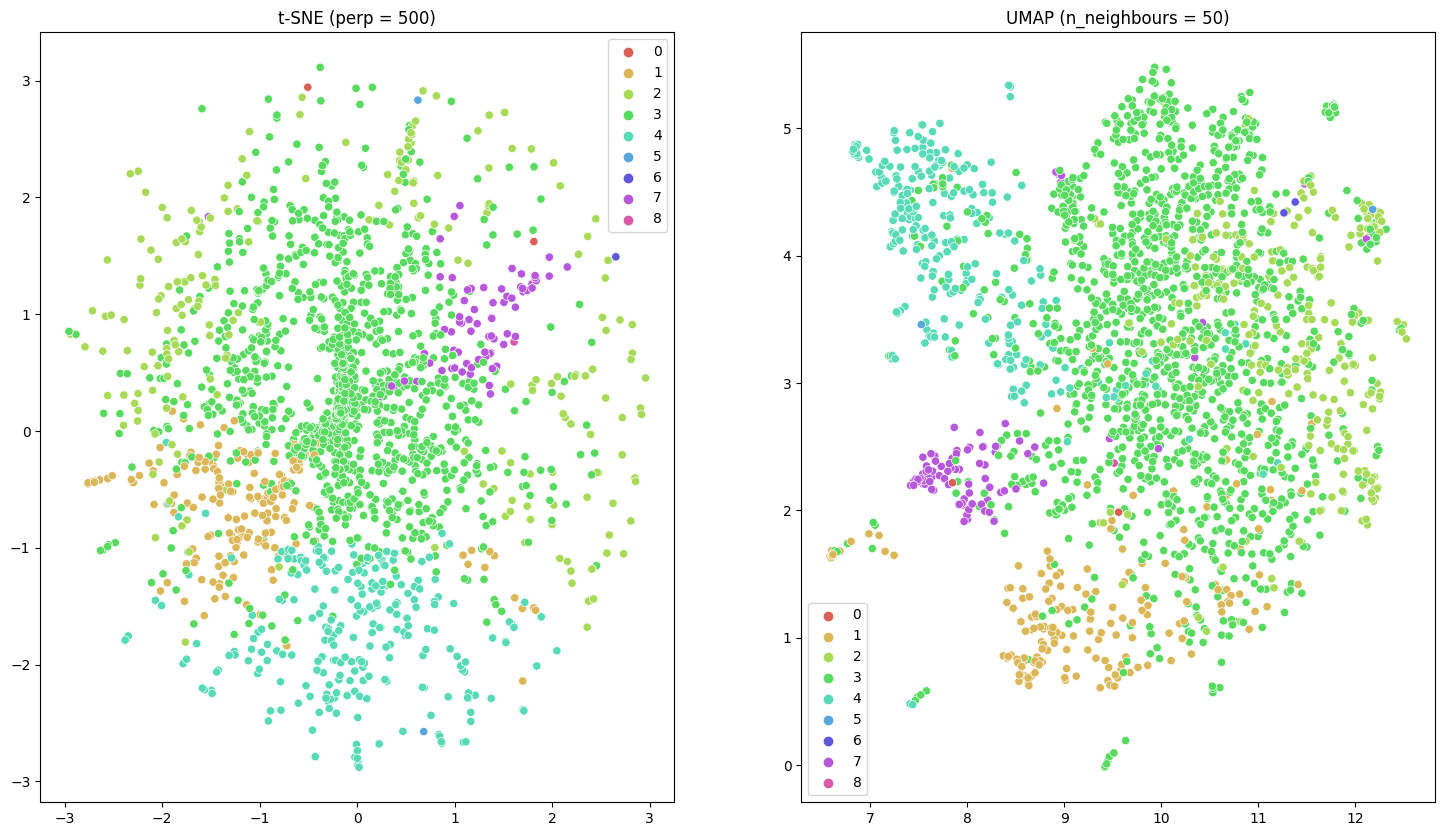

In [28]:
fig, axes = plt.subplots(1, 2,figsize=(18, 10))

sns.scatterplot(ax=axes[0], x=data_tsne[:,0],
    y=data_tsne[:,1],palette=sns.color_palette("hls", 9),hue=data_label).set(title="t-SNE (perp = {})".format(500))
sns.scatterplot(ax=axes[1], x=umap_data[:,0],
    y=umap_data[:,1],palette=sns.color_palette("hls", 9),hue=data_label).set(title="UMAP (n_neighbours = {})".format(50))

Podemos notar que o tempo para rodar o t-SNE é muito maior que o UMAP. O t-SNE levou 49.35 segundos, enquanto o UMAP levou 5.40 segundos. Analisando os plots, conseguimos notar que o UMAP consegue ter um melhor agrupamento dos dados quando comparado com o t-SNE. As classes 2 e 3 estão bastante esparsas no espaço, enquanto que no UMAP as classes conseguem ser melhor distinguidas.